# Walmart Project

# Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.
1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:

a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

b. If the weekly sales show a seasonal trend, when and what could be the reason?

c. Does temperature affect the weekly sales in any manner?

d. How is the Consumer Price index affecting the weekly sales of various stores?

e. Top performing stores according to the historical data.

f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.

2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.


In [85]:
#importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv(r"C:\Users\ardra\Downloads\Walmart.csv")

In [87]:
df.head(20)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1  05-02-2010    1643690.90             0        42.31       2.572   
1       1  12-02-2010    1641957.44             1        38.51       2.548   
2       1  19-02-2010    1611968.17             0        39.93       2.514   
3       1  26-02-2010    1409727.59             0        46.63       2.561   
4       1  05-03-2010    1554806.68             0        46.50       2.625   
5       1  12-03-2010    1439541.59             0        57.79       2.667   
6       1  19-03-2010    1472515.79             0        54.58       2.720   
7       1  26-03-2010    1404429.92             0        51.45       2.732   
8       1  02-04-2010    1594968.28             0        62.27       2.719   
9       1  09-04-2010    1545418.53             0        65.86       2.770   
10      1  16-04-2010    1466058.28             0        66.32       2.808   
11      1  23-04-2010    1391256.12             0        64.84       2.795   
12      1  30-04-2010    1425100.71             0        67.41       2.780   
13      1  07-05-2010    1603955.12             0        72.55       2.835   
14      1  14-05-2010    1494251.50             0        74.78       2.854   
15      1  21-05-2010    1399662.07             0        76.44       2.826   
16      1  28-05-2010    1432069.95             0        80.44       2.759   
17      1  04-06-2010    1615524.71             0        80.69       2.705   
18      1  11-06-2010    1542561.09             0        80.43       2.668   
19      1  18-06-2010    1503284.06             0        84.11       2.637   

           CPI  Unemployment  
0   211.096358         8.106  
1   211.242170         8.106  
2   211.289143         8.106  
3   211.319643         8.106  
4   211.350143         8.106  
5   211.380643         8.106  
6   211.215635         8.106  
7   211.018042         8.106  
8   210.820450         7.808  
9   210.622857         7.808  
10  210.488700         7.808  
11  210.439123         7.808  
12  210.389546         7.808  
13  210.339968         7.808  
14  210.337426         7.808  
15  210.617093         7.808  
16  210.896761         7.808  
17  211.176428         7.808  
18  211.456095         7.808  
19  211.453772         7.808

In [88]:
df.shape

(6435, 8)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [90]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [91]:
df.duplicated().sum()

0

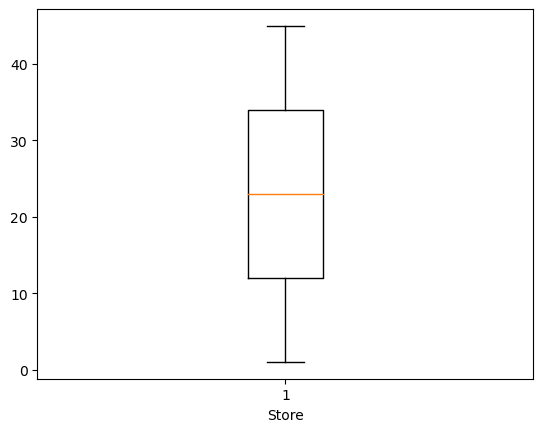

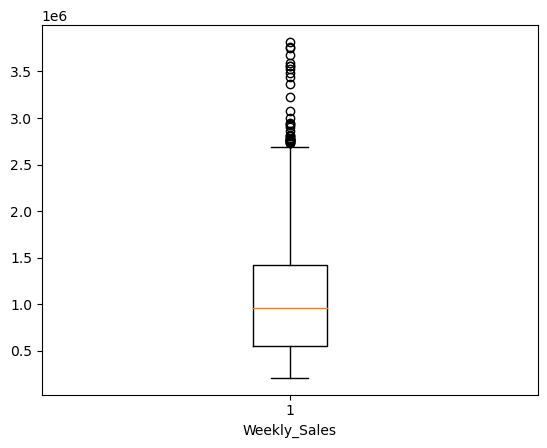

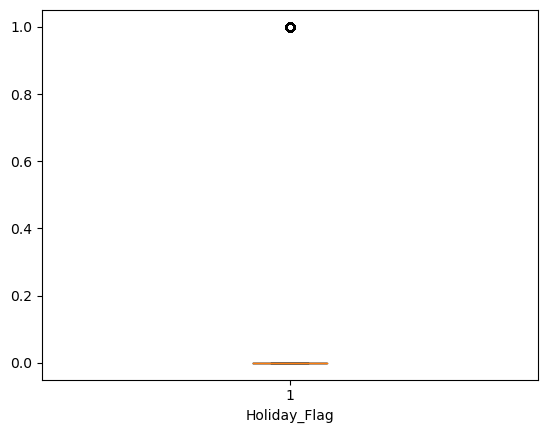

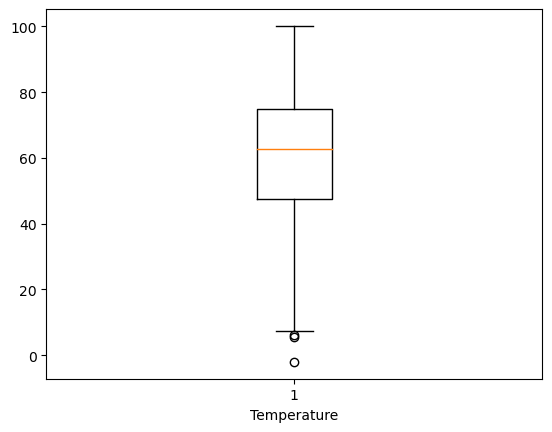

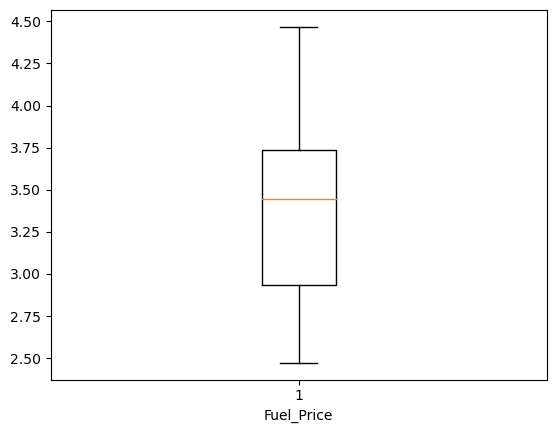

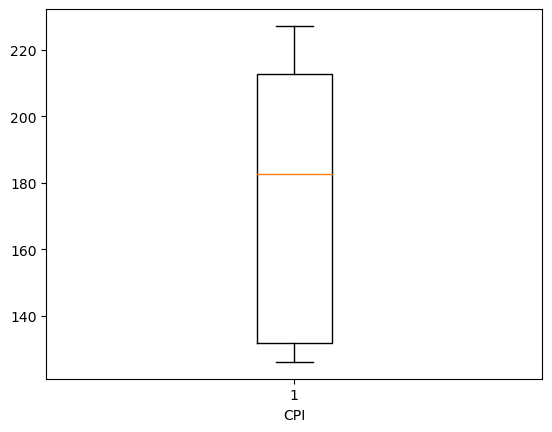

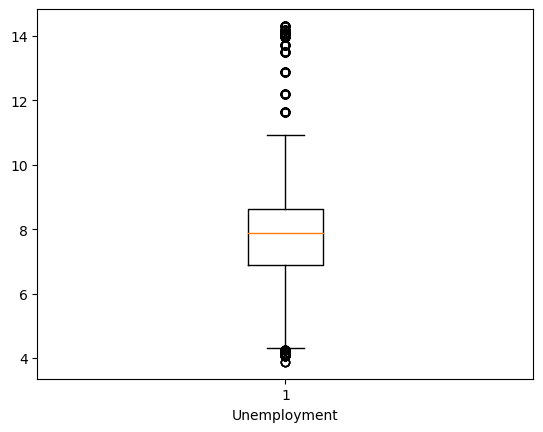

In [92]:
#outliers
for col in df.columns:
    if(df[col].dtypes!='object'):
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [93]:
out_col=["Weekly_Sales","Unemployment"]

In [94]:
for col in out_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    UL = q3 + 1.5* IQR
    LL = q1 - 1.5* IQR
    df = df[(df[col]>=LL) & (df[col]<=UL)]
    

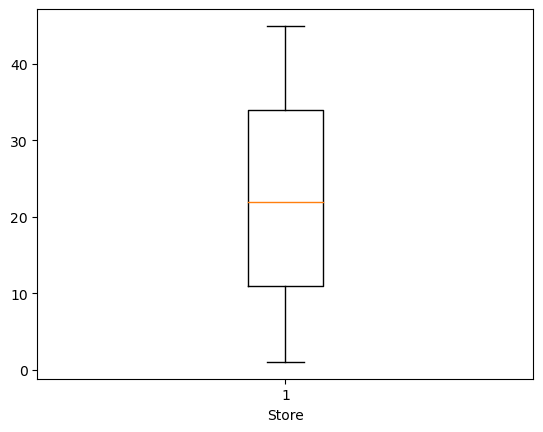

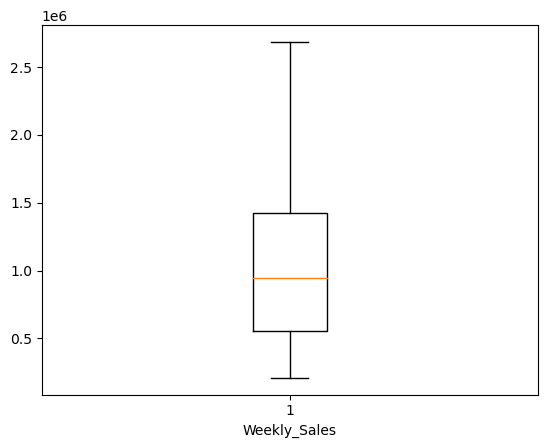

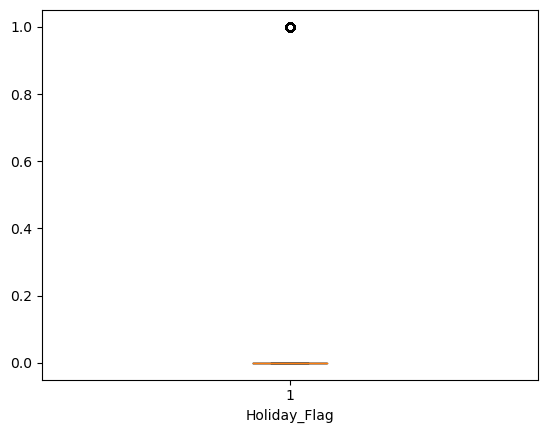

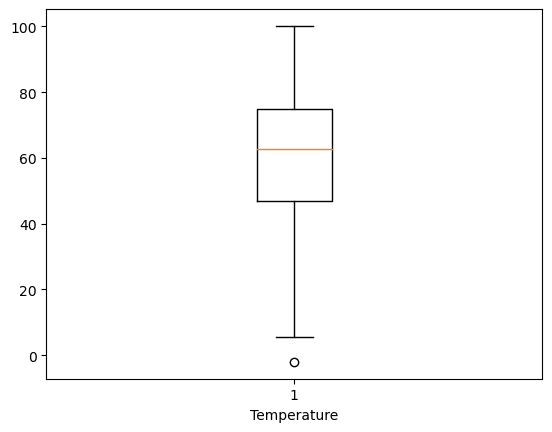

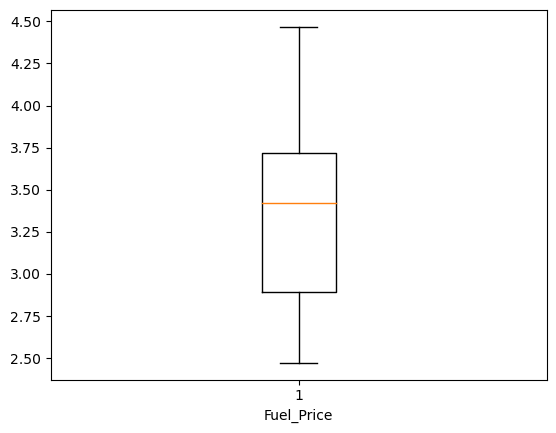

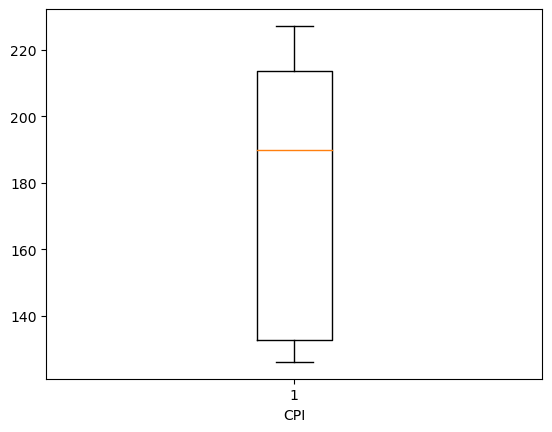

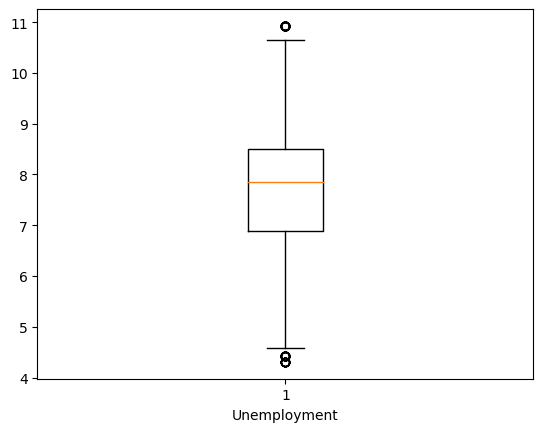

In [95]:
#verifying
for col in df.columns:
    if(df[col].dtypes!='object'):
        plt.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [59]:
df.describe().T

count          mean            std         min            25%  \
Store         5920.0  2.279814e+01      13.092635       1.000      11.000000   
Weekly_Sales  5920.0  1.039202e+06  551848.396276  209986.250  552640.417500   
Holiday_Flag  5920.0  6.908784e-02       0.253625       0.000       0.000000   
Temperature   5920.0  6.040442e+01      18.427013      -2.060      46.965000   
Fuel_Price    5920.0  3.340395e+00       0.458143       2.472       2.891000   
CPI           5920.0  1.750108e+02      39.022611     126.064     132.766139   
Unemployment  5920.0  7.722377e+00       1.243156       4.308       6.891000   

                        50%           75%           max  
Store             22.000000  3.400000e+01  4.500000e+01  
Weekly_Sales  946921.895000  1.427444e+06  2.685352e+06  
Holiday_Flag       0.000000  0.000000e+00  1.000000e+00  
Temperature       62.610000  7.472250e+01  1.001400e+02  
Fuel_Price         3.418500  3.721000e+00  4.468000e+00  
CPI              190.006988  2.137936e+02  2.272328e+02  
Unemployment       7.852000  8.494000e+00  1.092600e+01

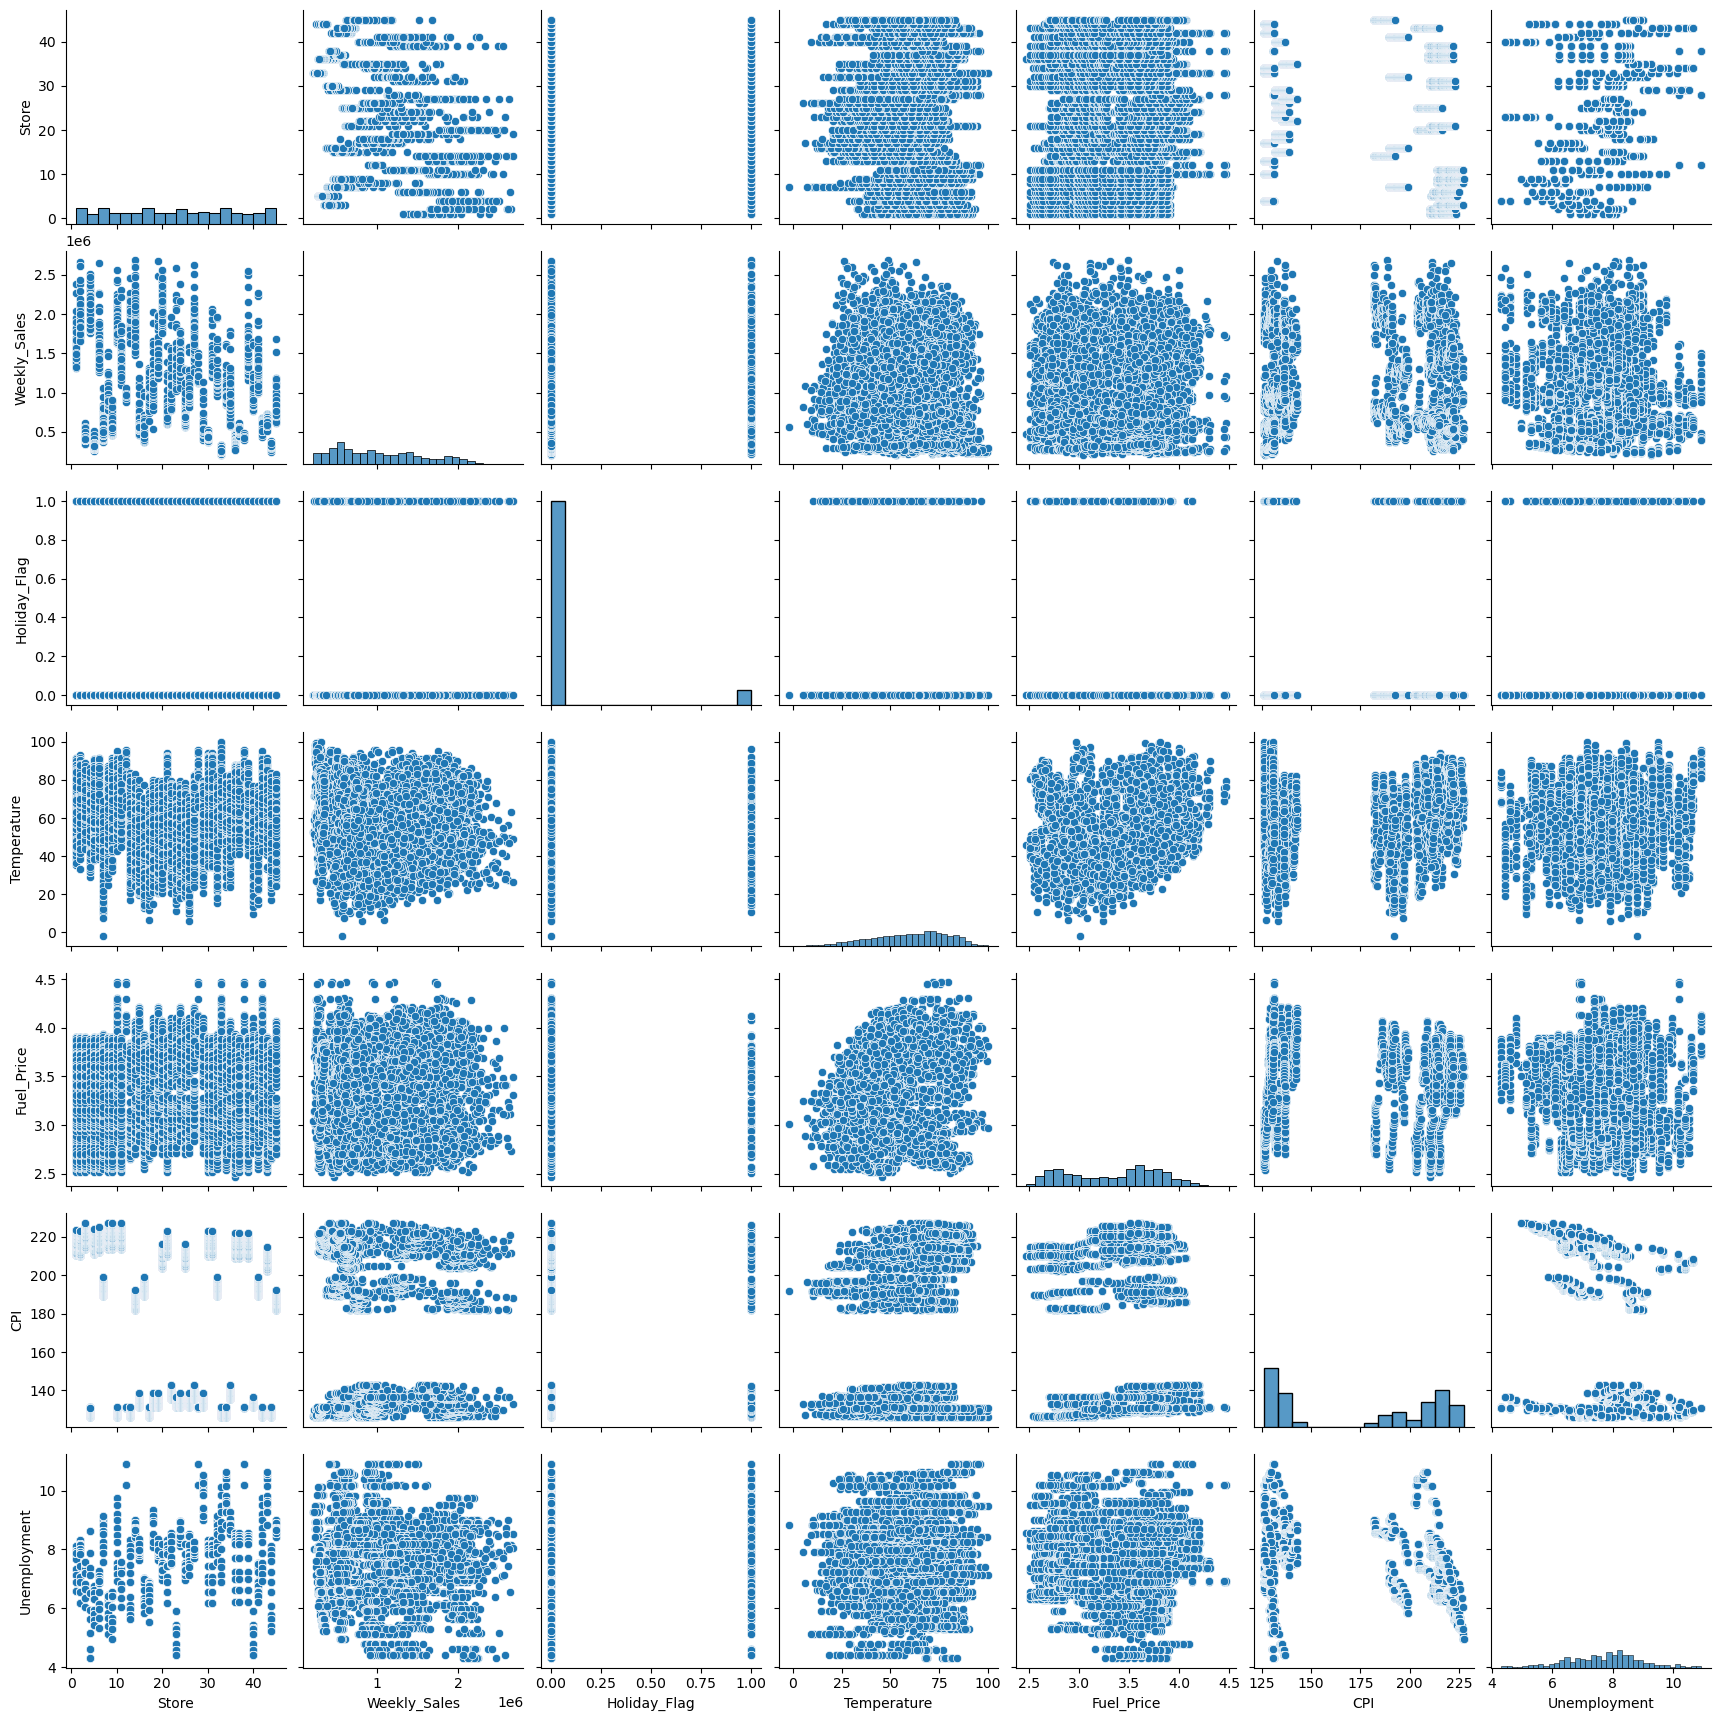

In [60]:
#Visualisation
sns.pairplot(df)
plt.show()

a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [61]:
cor=df.corr()
cor

C:\Users\ardra\AppData\Local\Temp\ipykernel_26572\3865792743.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Store         1.000000     -0.319128      0.004353    -0.026186    0.047717   
Weekly_Sales -0.319128      1.000000      0.024442    -0.040918    0.019767   
Holiday_Flag  0.004353      0.024442      1.000000    -0.156403   -0.076429   
Temperature  -0.026186     -0.040918     -0.156403     1.000000    0.145789   
Fuel_Price    0.047717      0.019767     -0.076429     0.145789    1.000000   
CPI          -0.208596     -0.082957     -0.000364     0.218164   -0.144272   
Unemployment  0.309445     -0.073227      0.011014     0.023905   -0.105187   

                   CPI  Unemployment  
Store        -0.208596      0.309445  
Weekly_Sales -0.082957     -0.073227  
Holiday_Flag -0.000364      0.011014  
Temperature   0.218164      0.023905  
Fuel_Price   -0.144272     -0.105187  
CPI           1.000000     -0.218764  
Unemployment -0.218764      1.000000

Inference:
    Since the correlation between Weekly_Sales and Unemployment is '-0.073227' ,as unemployment increases weekly sales decreases.
    

In [62]:
# Calculate correlation between weekly sales and unemployment rate for each store
correlation_per_store = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr() .iloc[0::2, -1]
correlation_per_store



Store              
1      Weekly_Sales   -0.097955
2      Weekly_Sales    0.054288
3      Weekly_Sales   -0.230413
4      Weekly_Sales   -0.633422
5      Weekly_Sales   -0.207043
6      Weekly_Sales    0.016833
7      Weekly_Sales   -0.165382
8      Weekly_Sales   -0.052580
9      Weekly_Sales   -0.191534
10     Weekly_Sales    0.186979
11     Weekly_Sales   -0.020339
12     Weekly_Sales    0.015141
13     Weekly_Sales   -0.400254
14     Weekly_Sales    0.269510
15     Weekly_Sales    0.078905
16     Weekly_Sales   -0.070864
17     Weekly_Sales   -0.263600
18     Weekly_Sales    0.139179
19     Weekly_Sales    0.101464
20     Weekly_Sales   -0.109391
21     Weekly_Sales    0.218367
22     Weekly_Sales    0.039043
23     Weekly_Sales   -0.231551
24     Weekly_Sales   -0.012261
25     Weekly_Sales   -0.004958
26     Weekly_Sales   -0.066899
27     Weekly_Sales   -0.002535
28     Weekly_Sales   -0.066340
29     Weekly_Sales    0.084682
30     Weekly_Sales    0.201862
31     Weekly_Sales 

In [63]:
# Find the stores suffering the most (stores with highest negative correlation)
stores_suffering = correlation_per_store.groupby('Store').min().idxmin()
print("Store suffering the most due to unemployment rate: ",stores_suffering)

Store suffering the most due to unemployment rate:  44


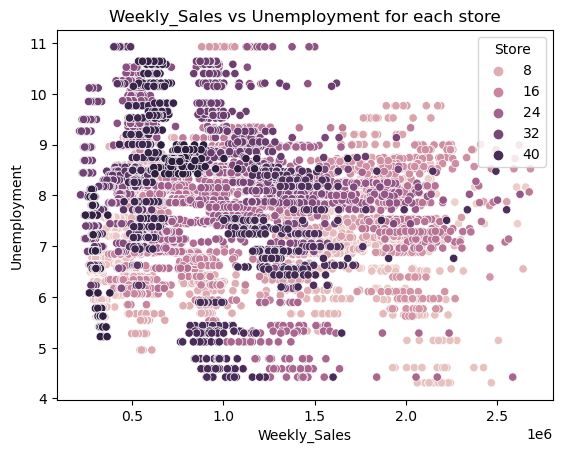

In [20]:
# Scatter plot of CPI vs Weekly Sales for each store
sns.scatterplot(data=df, x='Weekly_Sales', y='Unemployment', hue='Store')
plt.title('Weekly_Sales vs Unemployment for each store')
plt.xlabel('Weekly_Sales')
plt.ylabel('Unemployment')
plt.show()

b. If the weekly sales show a seasonal trend, when and what could be the reason?

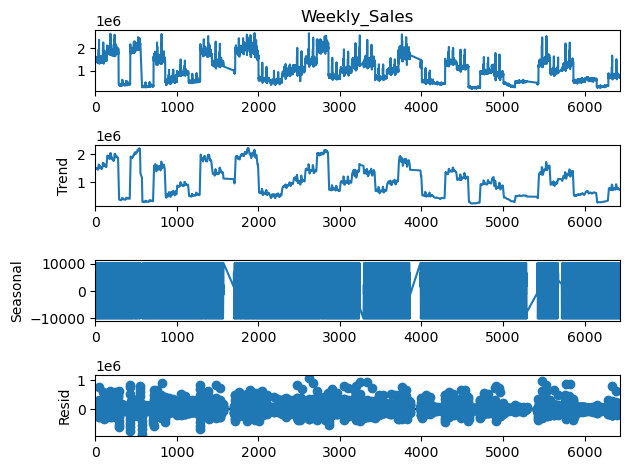

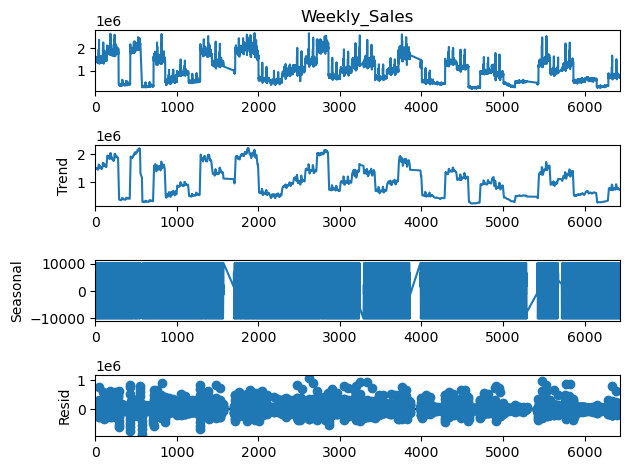

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Weekly_Sales'],period=12)
decomposition.plot()

c. Does temperature affect the weekly sales in any manner?

In [18]:
correlation = df['Temperature'].corr(df['Weekly_Sales'])
print("Correlation coefficient between temperature and weekly sales:", correlation)


Correlation coefficient between temperature and weekly sales: -0.040918195417939375


Inference:
    Since the correlation coefficient between temperature and weekly sales is '-0.040918195417939375' , there's little to no correlation between temperature and weekly sales.

d. How is the Consumer Price index affecting the weekly sales of various stores?

Correlation coefficient between CPI and weekly sales for each store:
Store     
1      CPI    0.225408
2      CPI   -0.063786
3      CPI    0.317250
4      CPI    0.669028
5      CPI    0.308261
6      CPI    0.033524
7      CPI    0.289044
8      CPI    0.120255
9      CPI    0.294805
10     CPI   -0.130205
11     CPI    0.069781
12     CPI   -0.234084
13     CPI    0.401445
14     CPI   -0.498495
15     CPI   -0.174467
16     CPI    0.124285
17     CPI    0.348571
18     CPI   -0.193541
19     CPI   -0.155341
20     CPI    0.203508
21     CPI   -0.163649
22     CPI   -0.038602
23     CPI    0.256672
24     CPI   -0.013684
25     CPI   -0.010914
26     CPI    0.131980
27     CPI   -0.235769
28     CPI   -0.121498
29     CPI   -0.072530
30     CPI   -0.298188
31     CPI    0.132887
32     CPI    0.196782
33     CPI   -0.052271
34     CPI    0.115437
35     CPI   -0.424107
36     CPI   -0.915095
37     CPI    0.244507
38     CPI   -0.109557
39     CPI    0.428043
40     CPI    0.225123


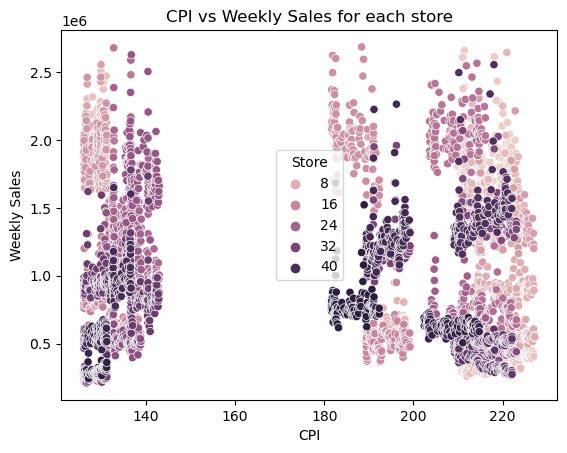

In [19]:
import pandas as pd

# Calculate the correlation coefficient between CPI and weekly sales for each store
correlation_by_store = df.groupby('Store')[['CPI', 'Weekly_Sales']].corr().iloc[0::2,-1]

# Print correlation coefficient for each store
print("Correlation coefficient between CPI and weekly sales for each store:")
print(correlation_by_store)

# Scatter plot of CPI vs Weekly Sales for each store
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', hue='Store')
plt.title('CPI vs Weekly Sales for each store')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()


e. Top performing stores according to the historical data.

In [25]:
# Calculate total sales for each store
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum()

# Sort stores based on total sales in descending order
top_stores = total_sales_by_store.sort_values(ascending=False)

# Print the top performing stores
print("Top 5 performing stores based on total sales:")
top_stores.head(5)


Top performing stores based on total sales:


Store
20    2.800237e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
10    2.556789e+08
Name: Weekly_Sales, dtype: float64

f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [33]:
# Calculate total sales for each store
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum()

# Sort stores based on total sales in ascending order to find the worst performing store
worst_store = total_sales_by_store.sort_values().index[0]

# Print the worst performing store
print("Worst performing store based on total sales:", worst_store)

# Calculate the difference between the highest and lowest performing stores
highest_sales = total_sales_by_store.max()
lowest_sales = total_sales_by_store.min()
difference = highest_sales - lowest_sales

# Print the significance of the difference
print("Difference between highest and lowest performing stores:", difference)

Worst performing store based on total sales: 38
Difference between highest and lowest performing stores: 272676355.92


# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

Forecasting using FBPROPHET

In [34]:
!pip install prophet

In [35]:
from prophet import Prophet


In [36]:
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[5920 rows x 8 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5920 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5920 non-null   int64  
 1   Date          5920 non-null   object 
 2   Weekly_Sales  5920 non-null   float64
 3   Holiday_Flag  5920 non-null   int64  
 4   Temperature   5920 non-null   float64
 5   Fuel_Price    5920 non-null   float64
 6   CPI           5920 non-null   float64
 7   Unemployment  5920 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 416.2+ KB


In [38]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\ardra\AppData\Local\Temp\ipykernel_26572\2394721818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5920 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         5920 non-null   int64         
 1   Date          5920 non-null   datetime64[ns]
 2   Weekly_Sales  5920 non-null   float64       
 3   Holiday_Flag  5920 non-null   int64         
 4   Temperature   5920 non-null   float64       
 5   Fuel_Price    5920 non-null   float64       
 6   CPI           5920 non-null   float64       
 7   Unemployment  5920 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 416.2 KB


11:17:22 - cmdstanpy - INFO - Chain [1] start processing
11:17:22 - cmdstanpy - INFO - Chain [1] done processing


Forecasting sales for Store 1
Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.972672e+06
144 2012-12-23  2.049070e+06
145 2012-12-30  1.948269e+06
146 2013-01-06  1.706988e+06
147 2013-01-13  1.492832e+06
148 2013-01-20  1.450370e+06
149 2013-01-27  1.574859e+06
150 2013-02-03  1.736412e+06
151 2013-02-10  1.813721e+06
152 2013-02-17  1.792142e+06
153 2013-02-24  1.740688e+06
154 2013-03-03  1.720266e+06
Forecasting sales for Store 2


11:17:22 - cmdstanpy - INFO - Chain [1] start processing
11:17:22 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
141 2012-12-16  2.147731e+06
142 2012-12-23  2.112914e+06
143 2012-12-30  2.013517e+06
144 2013-01-06  1.863154e+06
145 2013-01-13  1.743608e+06
146 2013-01-20  1.731447e+06
147 2013-01-27  1.826276e+06
148 2013-02-03  1.954087e+06
149 2013-02-10  2.035133e+06
150 2013-02-17  2.043212e+06
151 2013-02-24  2.005694e+06
152 2013-03-03  1.962316e+06
Forecasting sales for Store 3


11:17:23 - cmdstanpy - INFO - Chain [1] start processing
11:17:23 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds           yhat
143 2012-12-16  521434.244202
144 2012-12-23  536127.617108
145 2012-12-30  512000.839954
146 2013-01-06  455091.732325
147 2013-01-13  404192.561552
148 2013-01-20  395961.598758
149 2013-01-27  431802.433910
150 2013-02-03  479370.454168
151 2013-02-10  504262.110510
152 2013-02-17  498144.916252
153 2013-02-24  478140.384955
154 2013-03-03  464627.933116
Forecasting sales for Store 4


11:17:23 - cmdstanpy - INFO - Chain [1] start processing
11:17:23 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
120 2012-11-11  2.272927e+06
121 2012-11-18  2.382761e+06
122 2012-11-25  2.441756e+06
123 2012-12-02  2.374659e+06
124 2012-12-09  2.221071e+06
125 2012-12-16  2.103188e+06
126 2012-12-23  2.102725e+06
127 2012-12-30  2.180677e+06
128 2013-01-06  2.229166e+06
129 2013-01-13  2.196190e+06
130 2013-01-20  2.142163e+06
131 2013-01-27  2.166685e+06
Forecasting sales for Store 5


11:17:24 - cmdstanpy - INFO - Chain [1] start processing
11:17:24 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds           yhat
143 2012-12-16  392780.654241
144 2012-12-23  418898.663341
145 2012-12-30  411057.655565
146 2013-01-06  362867.247673
147 2013-01-13  311674.007513
148 2013-01-20  300458.662804
149 2013-01-27  333578.213656
150 2013-02-03  375151.382062
151 2013-02-10  388990.081982
152 2013-02-17  373323.886181
153 2013-02-24  354185.846105
154 2013-03-03  351468.427854
Forecasting sales for Store 6


11:17:24 - cmdstanpy - INFO - Chain [1] start processing
11:17:24 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
142 2012-12-16  1.941577e+06
143 2012-12-23  2.054400e+06
144 2012-12-30  1.926467e+06
145 2013-01-06  1.598004e+06
146 2013-01-13  1.316669e+06
147 2013-01-20  1.291519e+06
148 2013-01-27  1.489398e+06
149 2013-02-03  1.690426e+06
150 2013-02-10  1.725735e+06
151 2013-02-17  1.629663e+06
152 2013-02-24  1.558336e+06
153 2013-03-03  1.597224e+06
Forecasting sales for Store 7


11:17:25 - cmdstanpy - INFO - Chain [1] start processing
11:17:25 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds           yhat
143 2012-12-16  820279.361067
144 2012-12-23  906529.593778
145 2012-12-30  879026.751172
146 2013-01-06  742828.911010
147 2013-01-13  600563.080765
148 2013-01-20  552706.879001
149 2013-01-27  605487.364458
150 2013-02-03  679369.210905
151 2013-02-10  698931.155742
152 2013-02-17  663380.844725
153 2013-02-24  630121.700840
154 2013-03-03  642887.700362
Forecasting sales for Store 8


11:17:25 - cmdstanpy - INFO - Chain [1] start processing
11:17:25 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.198460e+06
144 2012-12-23  1.227625e+06
145 2012-12-30  1.136656e+06
146 2013-01-06  9.669852e+05
147 2013-01-13  8.317607e+05
148 2013-01-20  8.141203e+05
149 2013-01-27  8.994889e+05
150 2013-02-03  1.004051e+06
151 2013-02-10  1.057715e+06
152 2013-02-17  1.053028e+06
153 2013-02-24  1.023992e+06
154 2013-03-03  9.978443e+05


11:17:26 - cmdstanpy - INFO - Chain [1] start processing
11:17:26 - cmdstanpy - INFO - Chain [1] done processing


Forecasting sales for Store 9
Forecasted sales for the next 12 weeks:
            ds           yhat
143 2012-12-16  735719.013631
144 2012-12-23  770442.246562
145 2012-12-30  722191.895806
146 2013-01-06  609438.438363
147 2013-01-13  514308.880044
148 2013-01-20  504860.220674
149 2013-01-27  572973.626266
150 2013-02-03  650250.877146
151 2013-02-10  678201.827518
152 2013-02-17  655865.056074
153 2013-02-24  622693.503408
154 2013-03-03  608757.402170
Forecasting sales for Store 10


11:17:26 - cmdstanpy - INFO - Chain [1] start processing
11:17:26 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
138 2012-12-16  1.987613e+06
139 2012-12-23  1.965603e+06
140 2012-12-30  1.848252e+06
141 2013-01-06  1.687783e+06
142 2013-01-13  1.578103e+06
143 2013-01-20  1.584633e+06
144 2013-01-27  1.698580e+06
145 2013-02-03  1.848619e+06
146 2013-02-10  1.954132e+06
147 2013-02-17  1.976429e+06
148 2013-02-24  1.933442e+06
149 2013-03-03  1.874195e+06
Forecasting sales for Store 11


11:17:27 - cmdstanpy - INFO - Chain [1] start processing
11:17:27 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.786365e+06
144 2012-12-23  1.828347e+06
145 2012-12-30  1.671042e+06
146 2013-01-06  1.394040e+06
147 2013-01-13  1.180203e+06
148 2013-01-20  1.154185e+06
149 2013-01-27  1.286175e+06
150 2013-02-03  1.444019e+06
151 2013-02-10  1.521420e+06
152 2013-02-17  1.510006e+06
153 2013-02-24  1.465889e+06
154 2013-03-03  1.435017e+06
Forecasting sales for Store 12


11:17:27 - cmdstanpy - INFO - Chain [1] start processing
11:17:28 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
           ds           yhat
17 2012-12-16 -270871.187661
18 2012-12-23 -271052.766864
19 2012-12-30 -271234.346067
20 2013-01-06 -271415.925271
21 2013-01-13 -271597.504477
22 2013-01-20 -271779.083680
23 2013-01-27 -271960.662883
24 2013-02-03 -272142.242089
25 2013-02-10 -272323.821296
26 2013-02-17 -272505.400499
27 2013-02-24 -272686.979705
28 2013-03-03 -272868.558909
Forecasting sales for Store 13


11:17:28 - cmdstanpy - INFO - Chain [1] start processing
11:17:28 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
137 2012-12-16  1.994431e+06
138 2012-12-23  2.044101e+06
139 2012-12-30  2.070535e+06
140 2013-01-06  2.019335e+06
141 2013-01-13  1.930018e+06
142 2013-01-20  1.899539e+06
143 2013-01-27  1.979081e+06
144 2013-02-03  2.117016e+06
145 2013-02-10  2.209654e+06
146 2013-02-17  2.202606e+06
147 2013-02-24  2.134081e+06
148 2013-03-03  2.081540e+06
Forecasting sales for Store 14


11:17:28 - cmdstanpy - INFO - Chain [1] start processing
11:17:28 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
139 2012-12-16  1.814331e+06
140 2012-12-23  1.823807e+06
141 2012-12-30  1.713782e+06
142 2013-01-06  1.517654e+06
143 2013-01-13  1.372510e+06
144 2013-01-20  1.388787e+06
145 2013-01-27  1.541493e+06
146 2013-02-03  1.698018e+06
147 2013-02-10  1.747810e+06
148 2013-02-17  1.694073e+06
149 2013-02-24  1.621351e+06
150 2013-03-03  1.593686e+06
Forecasting sales for Store 15


11:17:29 - cmdstanpy - INFO - Chain [1] start processing
11:17:29 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds           yhat
143 2012-12-16  867818.541279
144 2012-12-23  922163.479490
145 2012-12-30  813391.957059
146 2013-01-06  588406.763325
147 2013-01-13  409743.432403
148 2013-01-20  396304.434534
149 2013-01-27  513065.907244
150 2013-02-03  624486.518319
151 2013-02-10  640284.082929
152 2013-02-17  589073.564093
153 2013-02-24  554366.309902
154 2013-03-03  568293.772832
Forecasting sales for Store 16


11:17:30 - cmdstanpy - INFO - Chain [1] start processing
11:17:30 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds           yhat
143 2012-12-16  743511.152207
144 2012-12-23  808101.113647
145 2012-12-30  750033.810706
146 2013-01-06  605921.857255
147 2013-01-13  485234.995927
148 2013-01-20  464712.918988
149 2013-01-27  523342.684211
150 2013-02-03  580185.083419
151 2013-02-10  583000.421282
152 2013-02-17  549567.697550
153 2013-02-24  529134.087406
154 2013-03-03  541803.220293
Forecasting sales for Store 17


11:17:30 - cmdstanpy - INFO - Chain [1] start processing
11:17:30 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.089103e+06
144 2012-12-23  1.139055e+06
145 2012-12-30  1.099448e+06
146 2013-01-06  9.740341e+05
147 2013-01-13  8.584670e+05
148 2013-01-20  8.458910e+05
149 2013-01-27  9.295687e+05
150 2013-02-03  1.014527e+06
151 2013-02-10  1.023683e+06
152 2013-02-17  9.743989e+05
153 2013-02-24  9.411537e+05
154 2013-03-03  9.585785e+05
Forecasting sales for Store 18


11:17:31 - cmdstanpy - INFO - Chain [1] start processing
11:17:31 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.444713e+06
144 2012-12-23  1.474071e+06
145 2012-12-30  1.285980e+06
146 2013-01-06  9.822353e+05
147 2013-01-13  7.721624e+05
148 2013-01-20  7.763925e+05
149 2013-01-27  9.276879e+05
150 2013-02-03  1.062907e+06
151 2013-02-10  1.090131e+06
152 2013-02-17  1.049656e+06
153 2013-02-24  1.027411e+06
154 2013-03-03  1.045816e+06
Forecasting sales for Store 19


11:17:31 - cmdstanpy - INFO - Chain [1] start processing
11:17:31 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.885333e+06
144 2012-12-23  1.965948e+06
145 2012-12-30  1.758523e+06
146 2013-01-06  1.382619e+06
147 2013-01-13  1.115739e+06
148 2013-01-20  1.124576e+06
149 2013-01-27  1.321027e+06
150 2013-02-03  1.483691e+06
151 2013-02-10  1.489971e+06
152 2013-02-17  1.403504e+06
153 2013-02-24  1.352637e+06
154 2013-03-03  1.373083e+06
Forecasting sales for Store 20


11:17:32 - cmdstanpy - INFO - Chain [1] start processing
11:17:32 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
136 2012-12-16  2.119299e+06
137 2012-12-23  2.160647e+06
138 2012-12-30  2.194535e+06
139 2013-01-06  2.160560e+06
140 2013-01-13  2.083663e+06
141 2013-01-20  2.051652e+06
142 2013-01-27  2.123054e+06
143 2013-02-03  2.264044e+06
144 2013-02-10  2.379725e+06
145 2013-02-17  2.402998e+06
146 2013-02-24  2.347921e+06
147 2013-03-03  2.280578e+06
Forecasting sales for Store 21


11:17:32 - cmdstanpy - INFO - Chain [1] start processing
11:17:32 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ardra\anaconda3\Lib\site-packages\prophet\plot.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(facecolor='w', figsize=figsize)


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.007206e+06
144 2012-12-23  1.046576e+06
145 2012-12-30  9.162814e+05
146 2013-01-06  6.874600e+05
147 2013-01-13  5.173226e+05
148 2013-01-20  5.028047e+05
149 2013-01-27  6.052083e+05
150 2013-02-03  7.111407e+05
151 2013-02-10  7.472695e+05
152 2013-02-17  7.265737e+05
153 2013-02-24  6.996954e+05
154 2013-03-03  6.895010e+05
Forecasting sales for Store 22


11:17:33 - cmdstanpy - INFO - Chain [1] start processing
11:17:33 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.430702e+06
144 2012-12-23  1.485484e+06
145 2012-12-30  1.308291e+06
146 2013-01-06  9.989713e+05
147 2013-01-13  7.822346e+05
148 2013-01-20  7.913445e+05
149 2013-01-27  9.516673e+05
150 2013-02-03  1.080374e+06
151 2013-02-10  1.078445e+06
152 2013-02-17  1.004063e+06
153 2013-02-24  9.699101e+05
154 2013-03-03  1.006605e+06
Forecasting sales for Store 23


11:17:33 - cmdstanpy - INFO - Chain [1] start processing
11:17:33 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
99  2012-01-01  1.481420e+06
100 2012-01-08  1.483113e+06
101 2012-01-15  1.484806e+06
102 2012-01-22  1.486498e+06
103 2012-01-29  1.488191e+06
104 2012-02-05  1.489884e+06
105 2012-02-12  1.491577e+06
106 2012-02-19  1.493269e+06
107 2012-02-26  1.494962e+06
108 2012-03-04  1.496655e+06
109 2012-03-11  1.498347e+06
110 2012-03-18  1.500040e+06
Forecasting sales for Store 24


11:17:34 - cmdstanpy - INFO - Chain [1] start processing
11:17:34 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.808320e+06
144 2012-12-23  1.893868e+06
145 2012-12-30  1.741164e+06
146 2013-01-06  1.431019e+06
147 2013-01-13  1.187067e+06
148 2013-01-20  1.159870e+06
149 2013-01-27  1.298892e+06
150 2013-02-03  1.436273e+06
151 2013-02-10  1.467803e+06
152 2013-02-17  1.428185e+06
153 2013-02-24  1.404361e+06
154 2013-03-03  1.418813e+06
Forecasting sales for Store 25


11:17:34 - cmdstanpy - INFO - Chain [1] start processing
11:17:34 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  9.493125e+05
144 2012-12-23  1.002391e+06
145 2012-12-30  8.879466e+05
146 2013-01-06  6.703772e+05
147 2013-01-13  5.173198e+05
148 2013-01-20  5.326677e+05
149 2013-01-27  6.597892e+05
150 2013-02-03  7.551819e+05
151 2013-02-10  7.410160e+05
152 2013-02-17  6.670314e+05
153 2013-02-24  6.292787e+05
154 2013-03-03  6.566836e+05
Forecasting sales for Store 26


11:17:35 - cmdstanpy - INFO - Chain [1] start processing
11:17:35 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.321105e+06
144 2012-12-23  1.367950e+06
145 2012-12-30  1.263744e+06
146 2013-01-06  1.061381e+06
147 2013-01-13  9.059033e+05
148 2013-01-20  8.956188e+05
149 2013-01-27  9.965364e+05
150 2013-02-03  1.094358e+06
151 2013-02-10  1.115276e+06
152 2013-02-17  1.082124e+06
153 2013-02-24  1.060146e+06
154 2013-03-03  1.072825e+06
Forecasting sales for Store 27


11:17:35 - cmdstanpy - INFO - Chain [1] start processing
11:17:35 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
141 2012-12-16  1.922226e+06
142 2012-12-23  1.908865e+06
143 2012-12-30  1.805527e+06
144 2013-01-06  1.615088e+06
145 2013-01-13  1.454138e+06
146 2013-01-20  1.433719e+06
147 2013-01-27  1.541332e+06
148 2013-02-03  1.660699e+06
149 2013-02-10  1.699457e+06
150 2013-02-17  1.672522e+06
151 2013-02-24  1.654141e+06
152 2013-03-03  1.674233e+06
Forecasting sales for Store 28


11:17:36 - cmdstanpy - INFO - Chain [1] start processing
11:17:36 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
           ds           yhat
17 2012-12-16 -525414.194051
18 2012-12-23 -529066.526682
19 2012-12-30 -532718.859314
20 2013-01-06 -536371.191947
21 2013-01-13 -540023.524582
22 2013-01-20 -543675.857214
23 2013-01-27 -547328.189845
24 2013-02-03 -550980.522481
25 2013-02-10 -554632.855118
26 2013-02-17 -558285.187749
27 2013-02-24 -561937.520384
28 2013-03-03 -565589.853016
Forecasting sales for Store 29


11:17:36 - cmdstanpy - INFO - Chain [1] start processing
11:17:36 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds           yhat
143 2012-12-16  759522.558328
144 2012-12-23  805246.537789
145 2012-12-30  718306.764088
146 2013-01-06  540132.573347
147 2013-01-13  399524.971452
148 2013-01-20  386715.137300
149 2013-01-27  472504.238697
150 2013-02-03  554259.907485
151 2013-02-10  566808.313177
152 2013-02-17  533372.960604
153 2013-02-24  514090.254852
154 2013-03-03  528836.860808
Forecasting sales for Store 30


11:17:37 - cmdstanpy - INFO - Chain [1] start processing
11:17:37 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds           yhat
143 2012-12-16  452438.033033
144 2012-12-23  442896.921620
145 2012-12-30  437492.853953
146 2013-01-06  439992.765874
147 2013-01-13  445410.223631
148 2013-01-20  445393.878226
149 2013-01-27  437552.625592
150 2013-02-03  428354.679006
151 2013-02-10  426130.717136
152 2013-02-17  431887.955753
153 2013-02-24  438324.844655
154 2013-03-03  438250.461331
Forecasting sales for Store 31


11:17:37 - cmdstanpy - INFO - Chain [1] start processing
11:17:37 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.665788e+06
144 2012-12-23  1.676785e+06
145 2012-12-30  1.585744e+06
146 2013-01-06  1.427262e+06
147 2013-01-13  1.301537e+06
148 2013-01-20  1.281882e+06
149 2013-01-27  1.353412e+06
150 2013-02-03  1.440632e+06
151 2013-02-10  1.483391e+06
152 2013-02-17  1.478580e+06
153 2013-02-24  1.457095e+06
154 2013-03-03  1.439586e+06
Forecasting sales for Store 32


11:17:38 - cmdstanpy - INFO - Chain [1] start processing
11:17:38 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.554398e+06
144 2012-12-23  1.584865e+06
145 2012-12-30  1.439434e+06
146 2013-01-06  1.200402e+06
147 2013-01-13  1.038371e+06
148 2013-01-20  1.048747e+06
149 2013-01-27  1.170771e+06
150 2013-02-03  1.267612e+06
151 2013-02-10  1.267698e+06
152 2013-02-17  1.213363e+06
153 2013-02-24  1.183491e+06
154 2013-03-03  1.198601e+06
Forecasting sales for Store 33


11:17:38 - cmdstanpy - INFO - Chain [1] start processing
11:17:38 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds           yhat
143 2012-12-16  263729.805230
144 2012-12-23  251443.242467
145 2012-12-30  246740.968514
146 2013-01-06  250673.717386
147 2013-01-13  257338.339423
148 2013-01-20  259826.223079
149 2013-01-27  256855.998828
150 2013-02-03  253515.972418
151 2013-02-10  255401.112165
152 2013-02-17  262238.669012
153 2013-02-24  267782.000653
154 2013-03-03  266316.395198
Forecasting sales for Store 34


11:17:39 - cmdstanpy - INFO - Chain [1] start processing
11:17:39 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.227870e+06
144 2012-12-23  1.269329e+06
145 2012-12-30  1.183057e+06
146 2013-01-06  1.007501e+06
147 2013-01-13  8.654167e+05
148 2013-01-20  8.492307e+05
149 2013-01-27  9.389634e+05
150 2013-02-03  1.035384e+06
151 2013-02-10  1.063757e+06
152 2013-02-17  1.033908e+06
153 2013-02-24  1.003630e+06
154 2013-03-03  1.003829e+06
Forecasting sales for Store 35


11:17:39 - cmdstanpy - INFO - Chain [1] start processing
11:17:39 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.099750e+06
144 2012-12-23  1.109552e+06
145 2012-12-30  9.698096e+05
146 2013-01-06  7.111245e+05
147 2013-01-13  4.962903e+05
148 2013-01-20  4.680320e+05
149 2013-01-27  6.134766e+05
150 2013-02-03  7.869456e+05
151 2013-02-10  8.565473e+05
152 2013-02-17  8.141538e+05
153 2013-02-24  7.465894e+05
154 2013-03-03  7.248904e+05
Forecasting sales for Store 36


11:17:40 - cmdstanpy - INFO - Chain [1] start processing
11:17:40 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds           yhat
143 2012-12-16  277256.458466
144 2012-12-23  248689.983896
145 2012-12-30  231164.824490
146 2013-01-06  234895.429401
147 2013-01-13  248072.525991
148 2013-01-20  250890.097322
149 2013-01-27  237855.298208
150 2013-02-03  222759.851106
151 2013-02-10  221464.788015
152 2013-02-17  233479.369896
153 2013-02-24  243657.189473
154 2013-03-03  240745.160342
Forecasting sales for Store 37


11:17:40 - cmdstanpy - INFO - Chain [1] start processing
11:17:40 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds           yhat
143 2012-12-16  540476.331957
144 2012-12-23  538167.465514
145 2012-12-30  536978.375597
146 2013-01-06  538321.580038
147 2013-01-13  540151.736785
148 2013-01-20  539967.586768
149 2013-01-27  538160.519346
150 2013-02-03  537625.031897
151 2013-02-10  539864.638562
152 2013-02-17  542158.982590
153 2013-02-24  539635.785170
154 2013-03-03  530732.624179
Forecasting sales for Store 38


11:17:41 - cmdstanpy - INFO - Chain [1] start processing
11:17:41 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
           ds           yhat
17 2012-12-16 -175483.312930
18 2012-12-23 -176637.515139
19 2012-12-30 -177791.717349
20 2013-01-06 -178945.919558
21 2013-01-13 -180100.121768
22 2013-01-20 -181254.323977
23 2013-01-27 -182408.526186
24 2013-02-03 -183562.728397
25 2013-02-10 -184716.930608
26 2013-02-17 -185871.132817
27 2013-02-24 -187025.335027
28 2013-03-03 -188179.537236


11:17:42 - cmdstanpy - INFO - Chain [1] start processing


Forecasting sales for Store 39


11:17:42 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  2.017403e+06
144 2012-12-23  2.135987e+06
145 2012-12-30  2.000404e+06
146 2013-01-06  1.668050e+06
147 2013-01-13  1.391902e+06
148 2013-01-20  1.369493e+06
149 2013-01-27  1.554363e+06
150 2013-02-03  1.728600e+06
151 2013-02-10  1.739592e+06
152 2013-02-17  1.634378e+06
153 2013-02-24  1.564407e+06
154 2013-03-03  1.599783e+06
Forecasting sales for Store 40


11:17:42 - cmdstanpy - INFO - Chain [1] start processing
11:17:42 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
100 2012-01-01  1.082227e+06
101 2012-01-08  1.083197e+06
102 2012-01-15  1.084168e+06
103 2012-01-22  1.085139e+06
104 2012-01-29  1.086109e+06
105 2012-02-05  1.087080e+06
106 2012-02-12  1.088051e+06
107 2012-02-19  1.089021e+06
108 2012-02-26  1.089992e+06
109 2012-03-04  1.090962e+06
110 2012-03-11  1.091933e+06
111 2012-03-18  1.092904e+06
Forecasting sales for Store 41


11:17:43 - cmdstanpy - INFO - Chain [1] start processing
11:17:43 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.830093e+06
144 2012-12-23  1.913975e+06
145 2012-12-30  1.764589e+06
146 2013-01-06  1.462392e+06
147 2013-01-13  1.228663e+06
148 2013-01-20  1.211346e+06
149 2013-01-27  1.356263e+06
150 2013-02-03  1.490523e+06
151 2013-02-10  1.507174e+06
152 2013-02-17  1.445752e+06
153 2013-02-24  1.405410e+06
154 2013-03-03  1.420016e+06
Forecasting sales for Store 42


11:17:44 - cmdstanpy - INFO - Chain [1] start processing
11:17:44 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds           yhat
143 2012-12-16  598043.588335
144 2012-12-23  568537.527364
145 2012-12-30  559409.235132
146 2013-01-06  577794.206308
147 2013-01-13  606404.053549
148 2013-01-20  619596.839366
149 2013-01-27  608141.569605
150 2013-02-03  586985.674378
151 2013-02-10  578488.943713
152 2013-02-17  589624.574911
153 2013-02-24  606973.094026
154 2013-03-03  613026.618843
Forecasting sales for Store 43


11:17:44 - cmdstanpy - INFO - Chain [1] start processing
11:17:44 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds           yhat
143 2012-12-16  606076.051354
144 2012-12-23  591919.492707
145 2012-12-30  585345.542470
146 2013-01-06  588031.747181
147 2013-01-13  595779.045422
148 2013-01-20  602970.654799
149 2013-01-27  606621.518131
150 2013-02-03  607114.735856
151 2013-02-10  606422.285270
152 2013-02-17  606064.535222
153 2013-02-24  606151.436428
154 2013-03-03  605768.046329
Forecasting sales for Store 44


11:17:45 - cmdstanpy - INFO - Chain [1] start processing
11:17:45 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds           yhat
143 2012-12-16  364903.465013
144 2012-12-23  369937.254983
145 2012-12-30  365998.362871
146 2013-01-06  358720.239517
147 2013-01-13  355471.442316
148 2013-01-20  357758.550158
149 2013-01-27  361092.565130
150 2013-02-03  361367.588685
151 2013-02-10  359614.726826
152 2013-02-17  359837.377880
153 2013-02-24  363338.456668
154 2013-03-03  366832.318426
Forecasting sales for Store 45


11:17:45 - cmdstanpy - INFO - Chain [1] start processing
11:17:45 - cmdstanpy - INFO - Chain [1] done processing


Forecasted sales for the next 12 weeks:
            ds          yhat
143 2012-12-16  1.122536e+06
144 2012-12-23  1.207911e+06
145 2012-12-30  1.085366e+06
146 2013-01-06  8.233889e+05
147 2013-01-13  6.165153e+05
148 2013-01-20  5.992860e+05
149 2013-01-27  7.298224e+05
150 2013-02-03  8.568207e+05
151 2013-02-10  8.804290e+05
152 2013-02-17  8.294730e+05
153 2013-02-24  7.921789e+05
154 2013-03-03  8.049296e+05


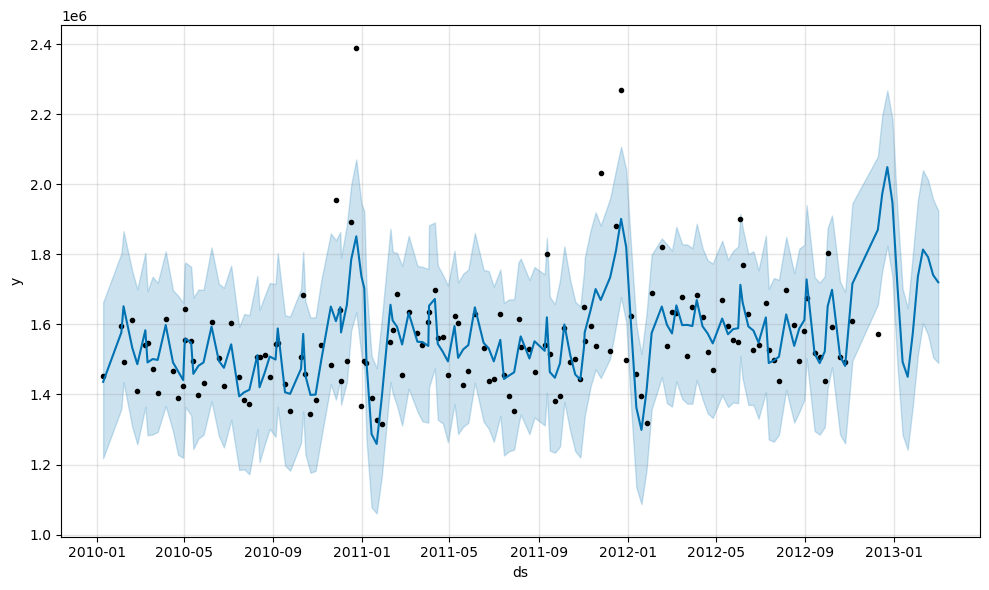

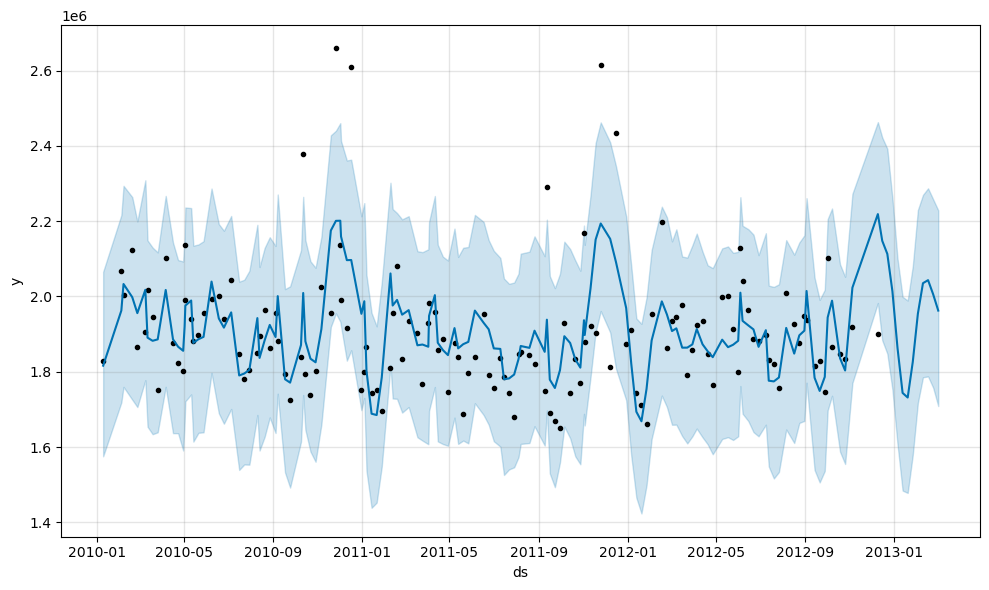

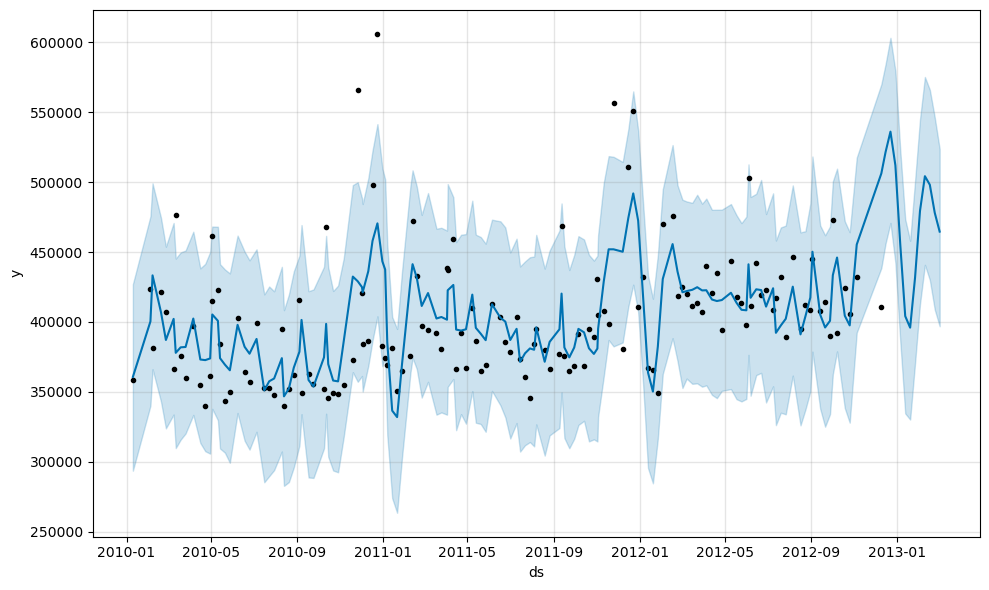

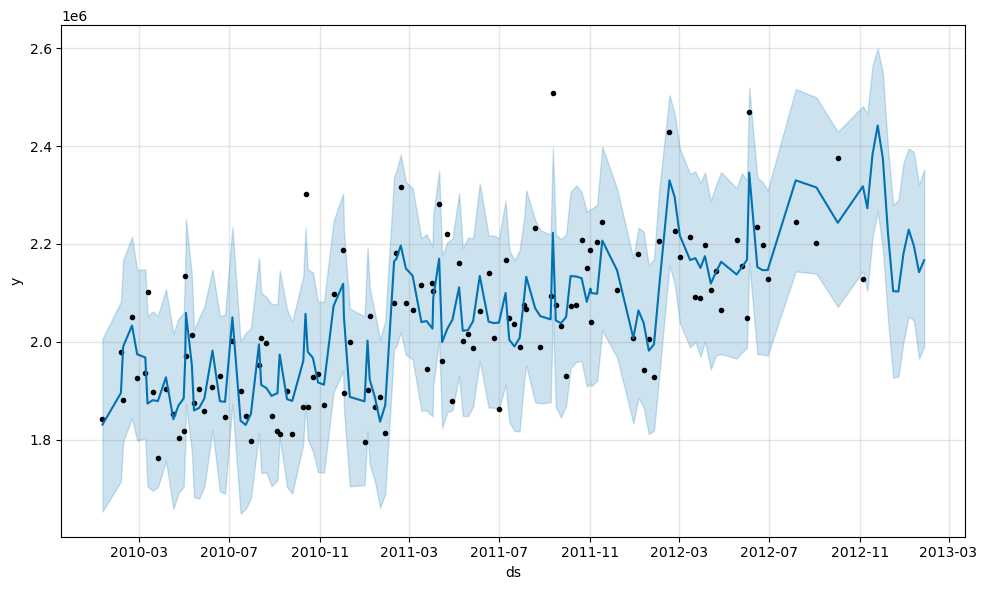

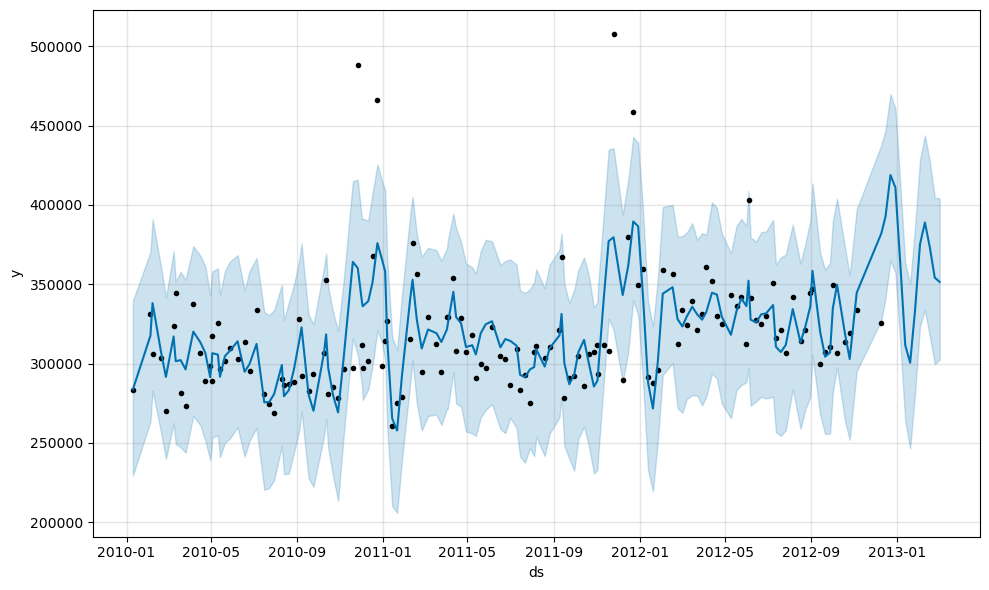

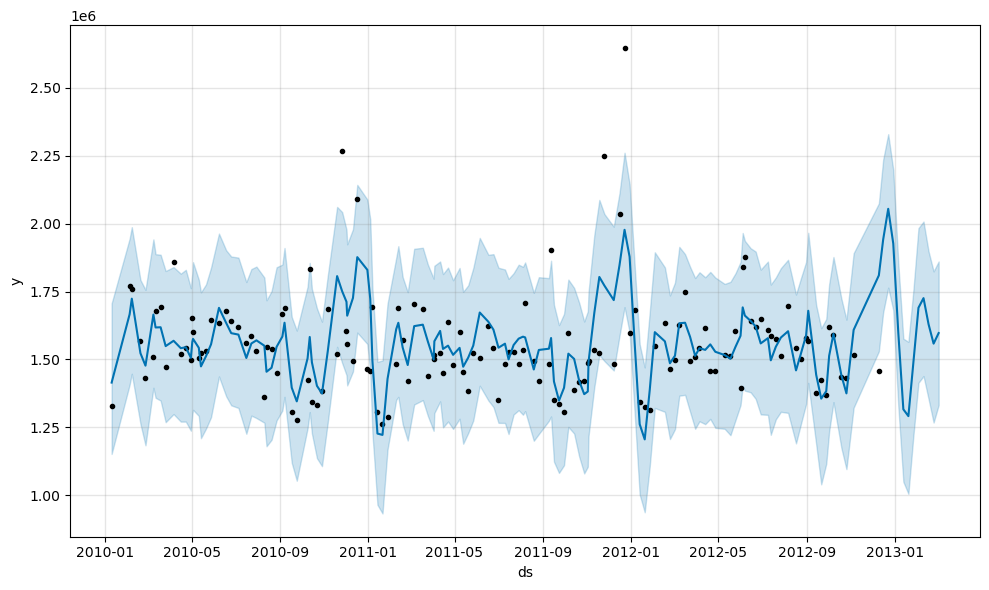

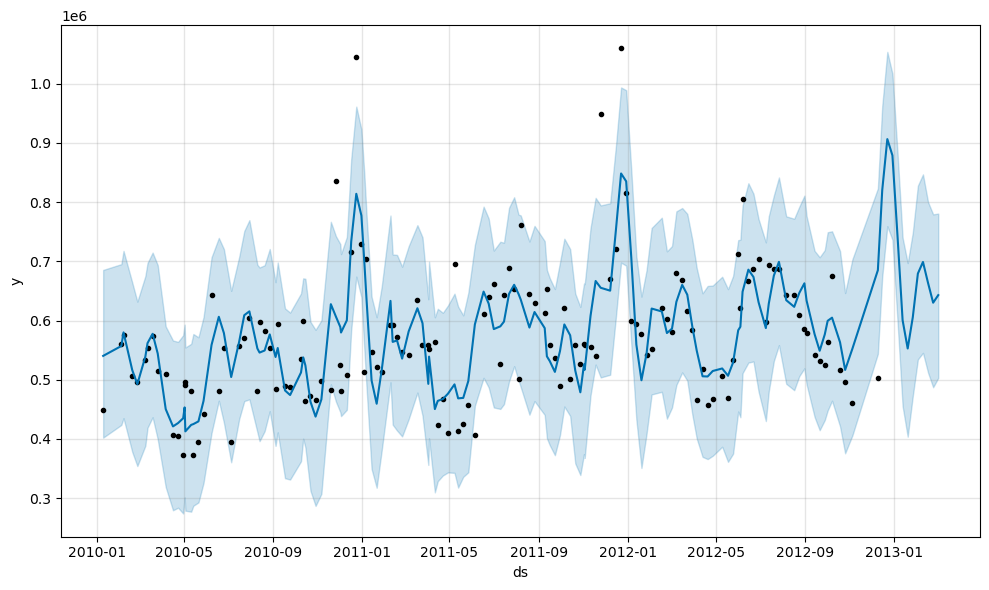

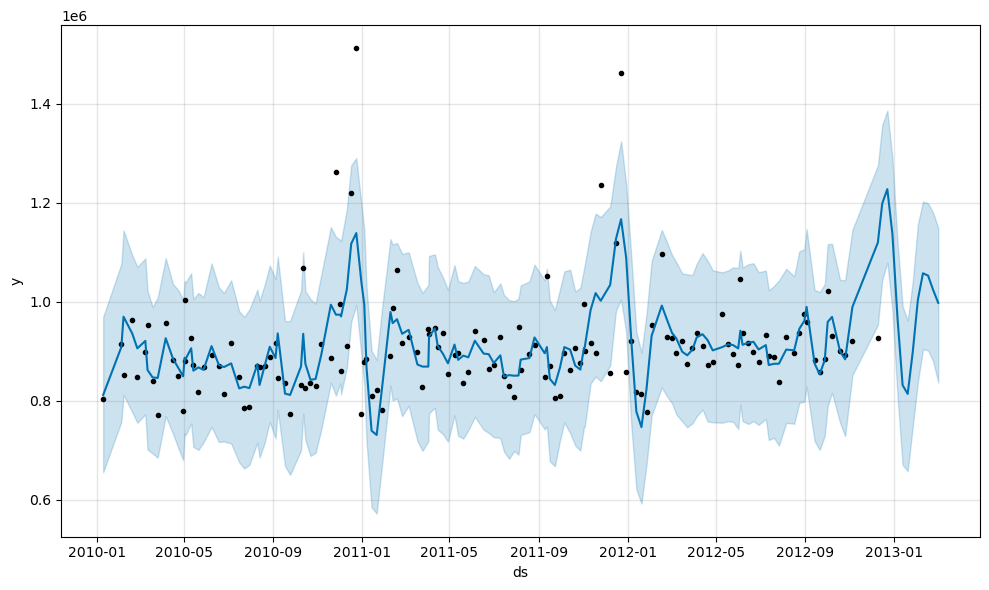

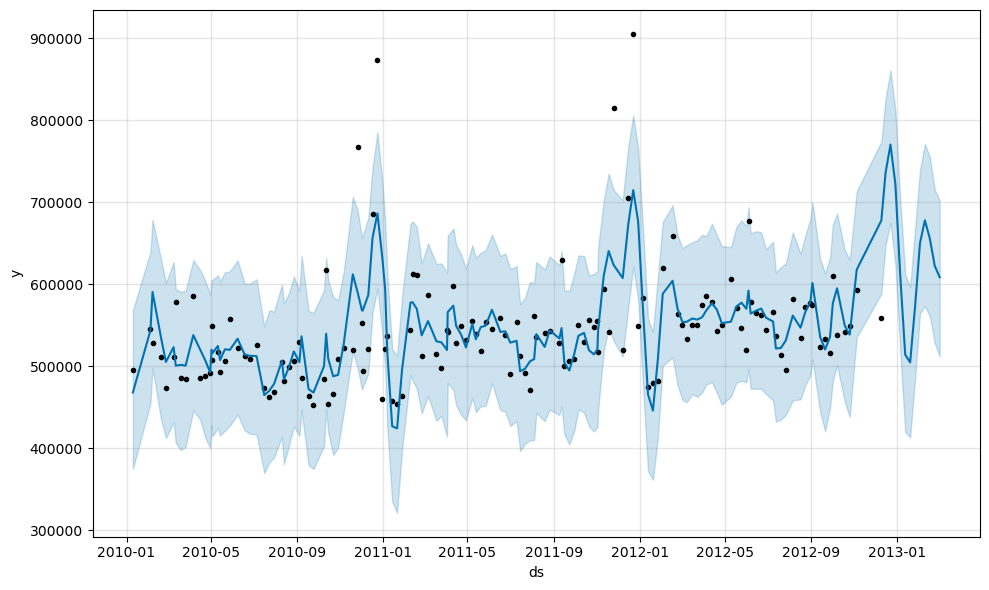

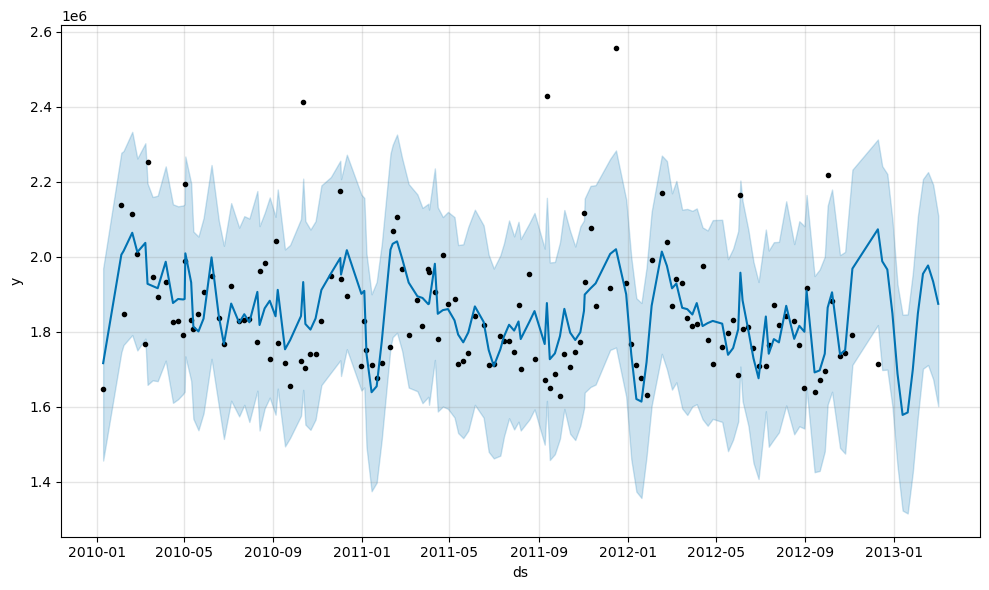

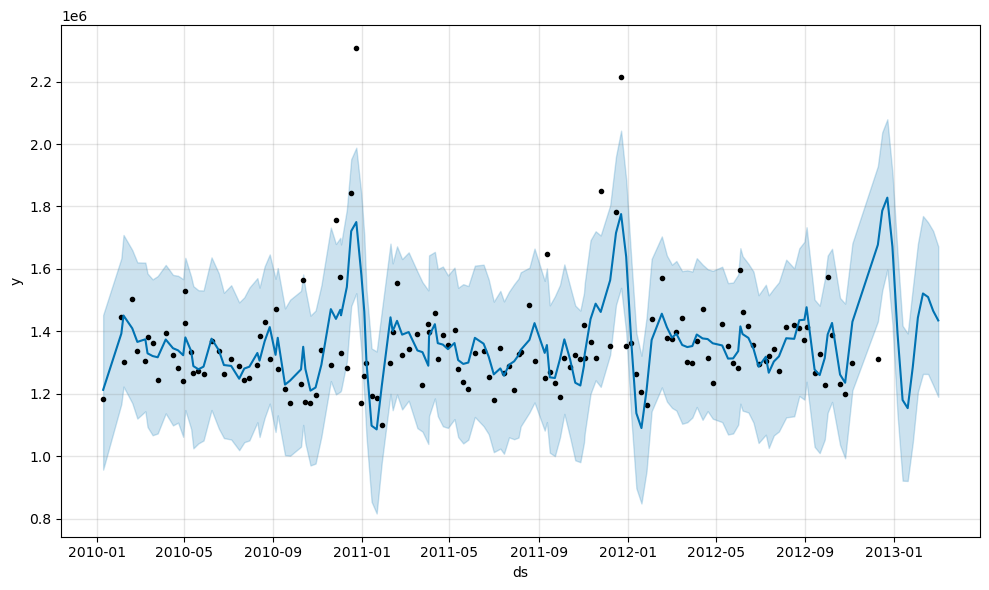

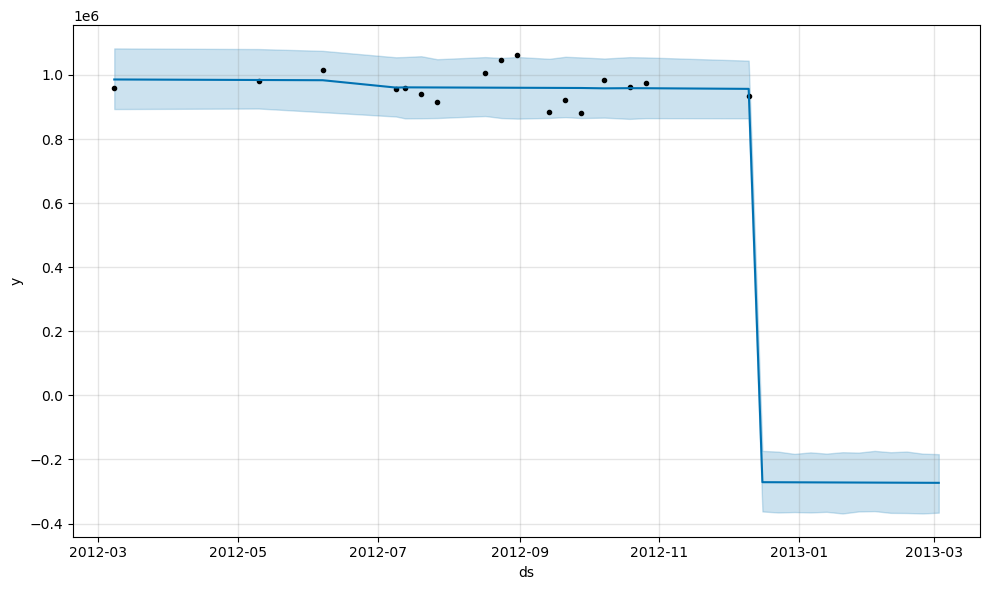

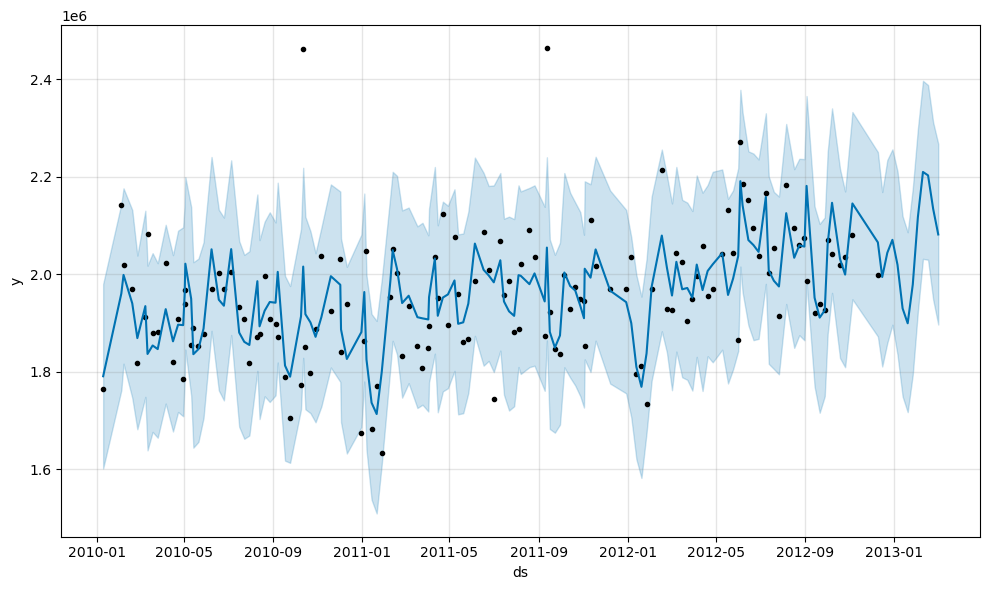

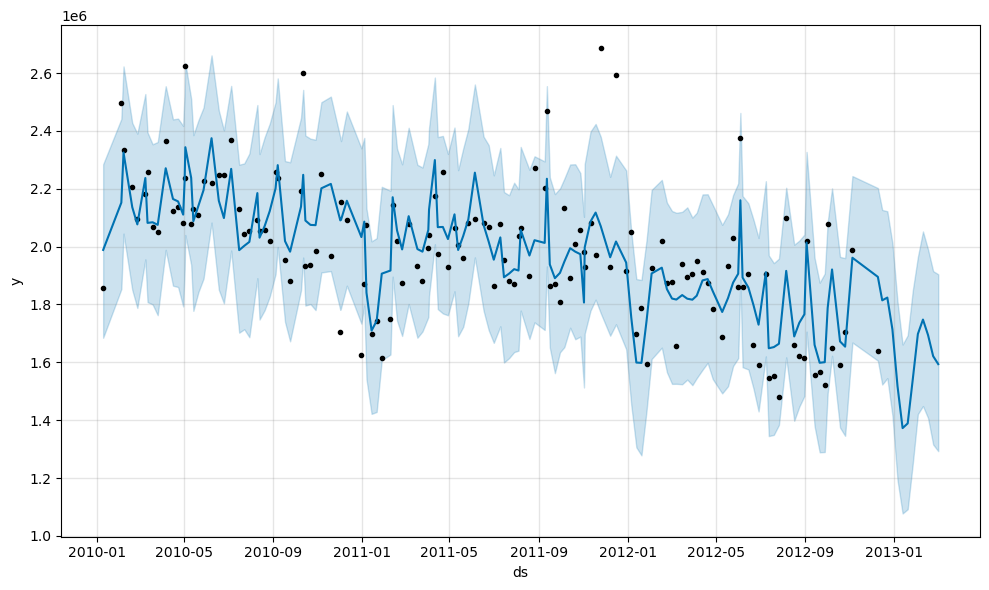

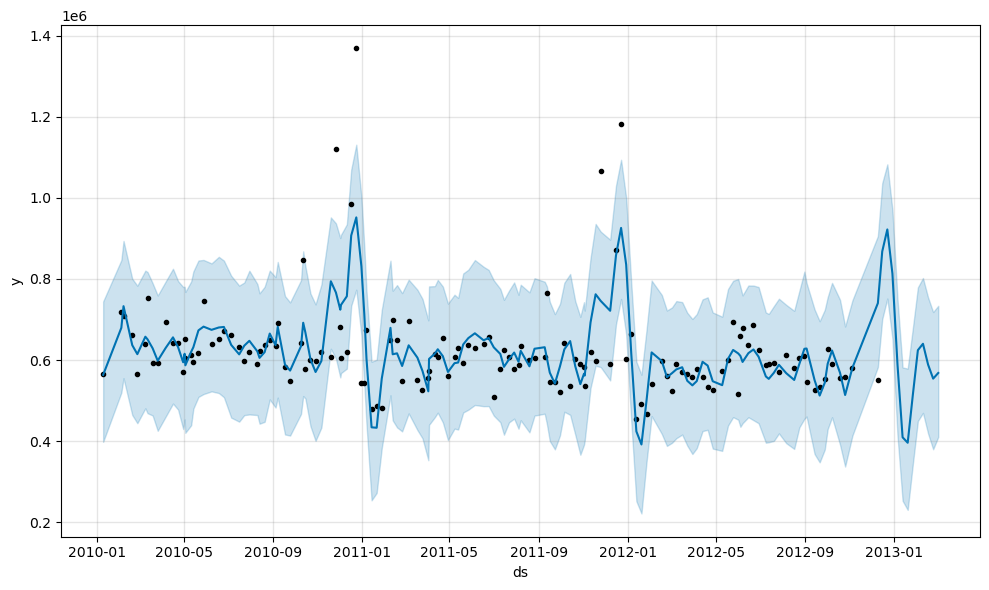

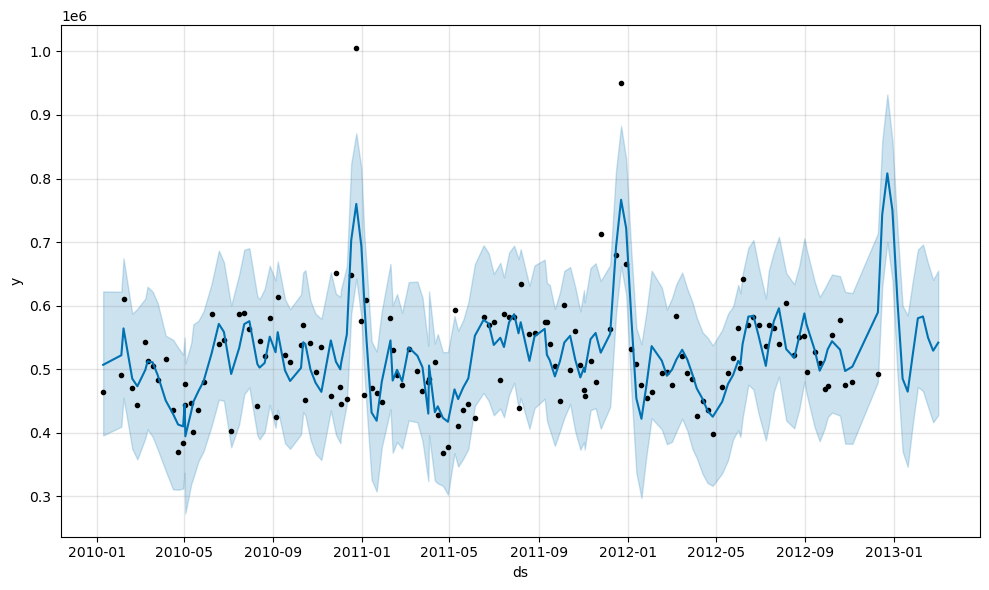

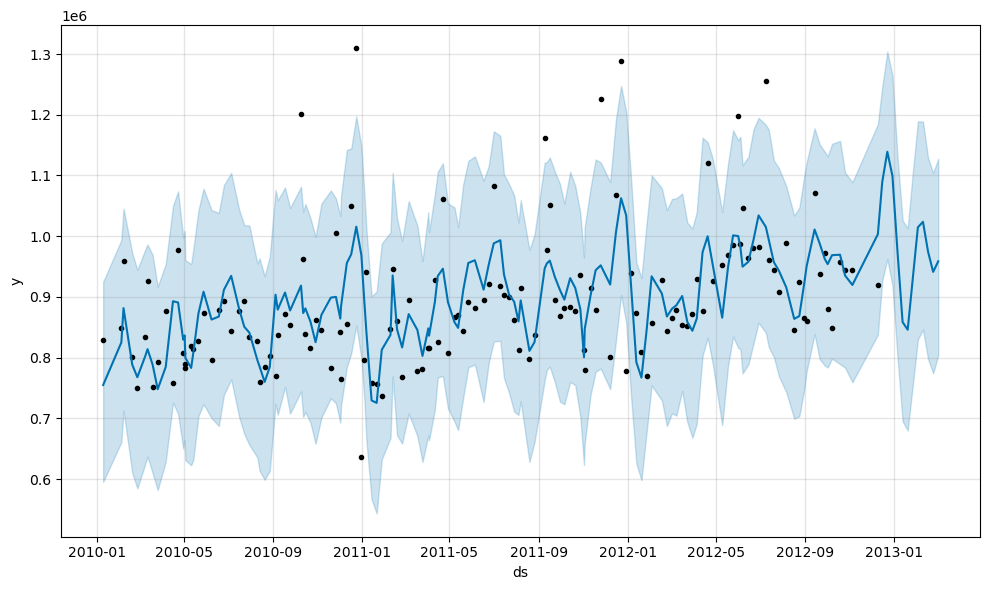

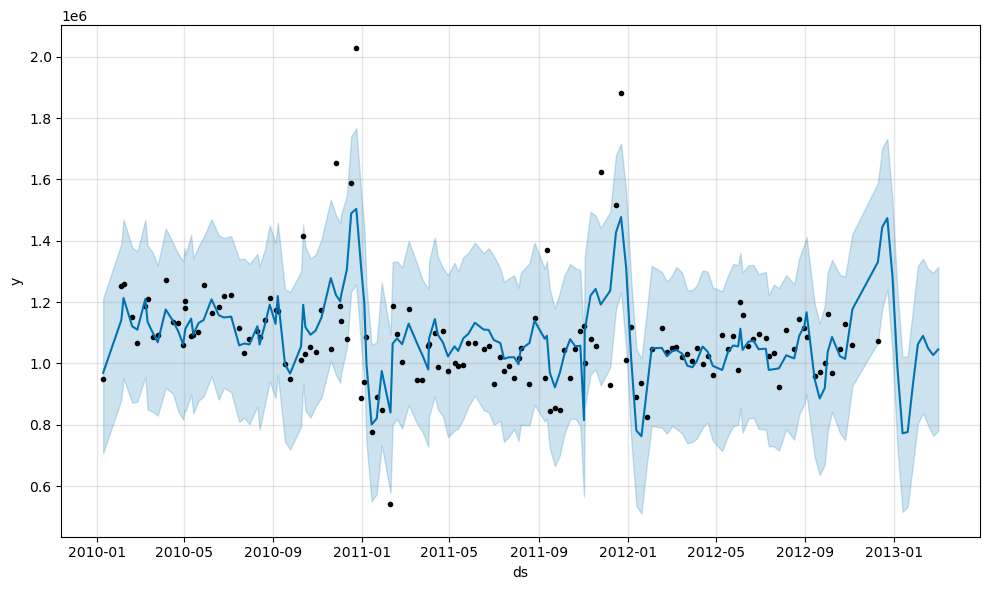

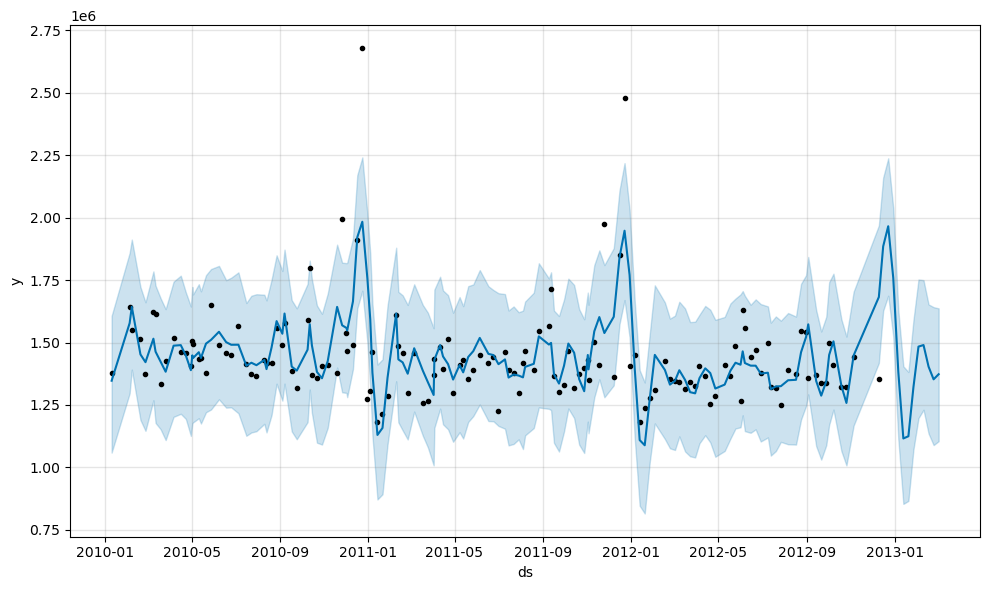

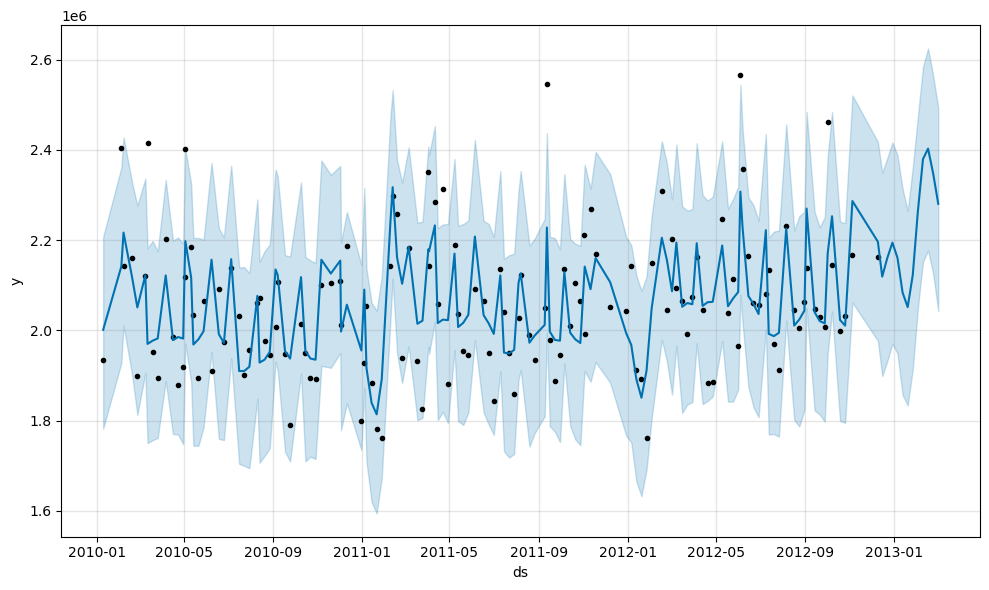

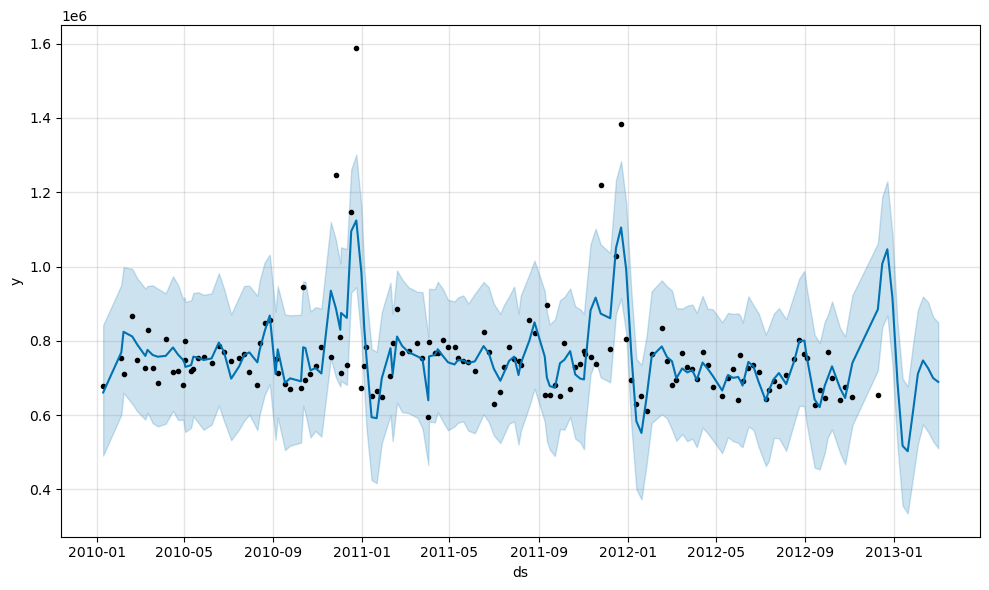

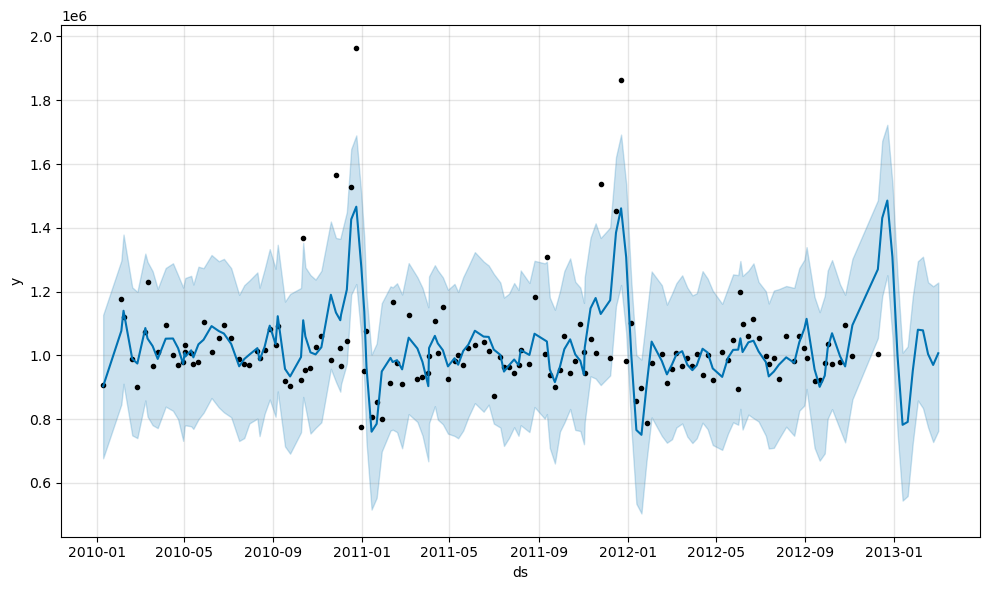

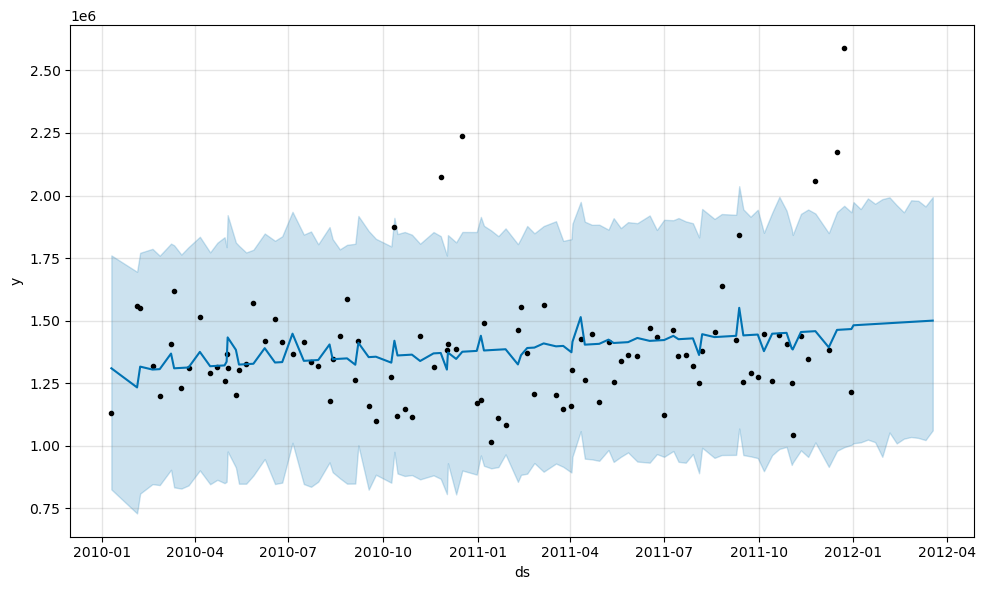

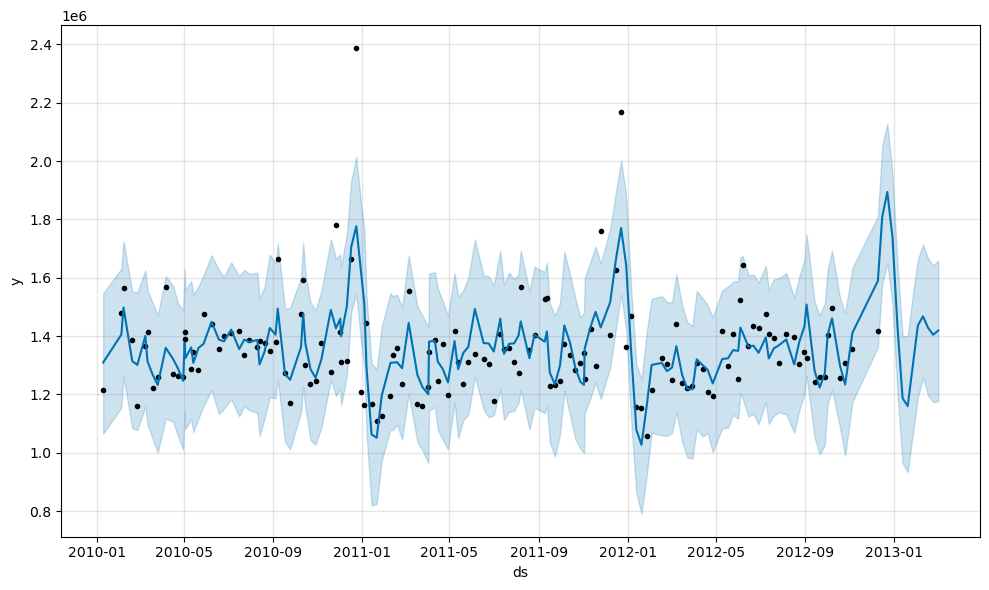

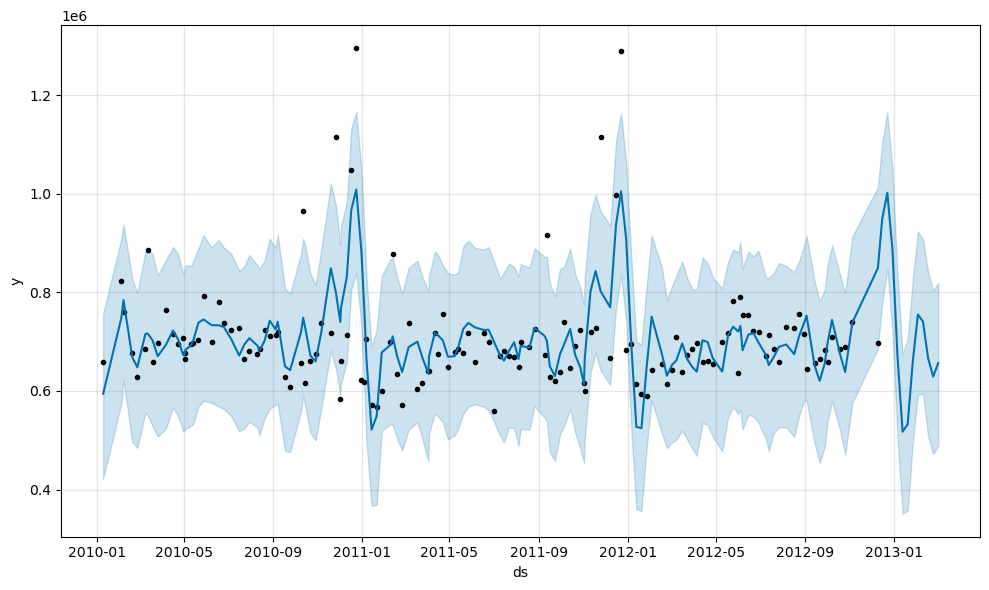

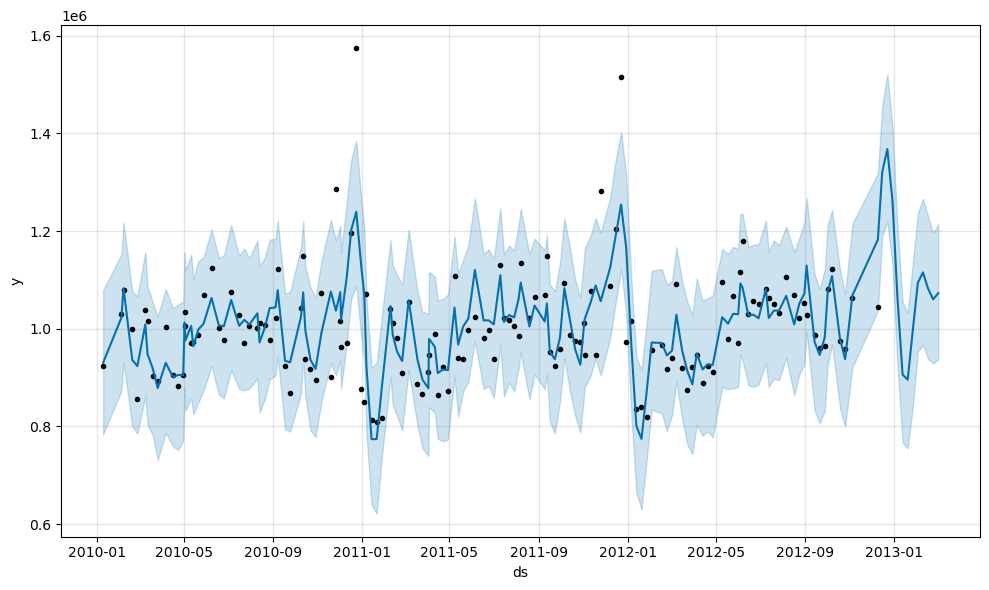

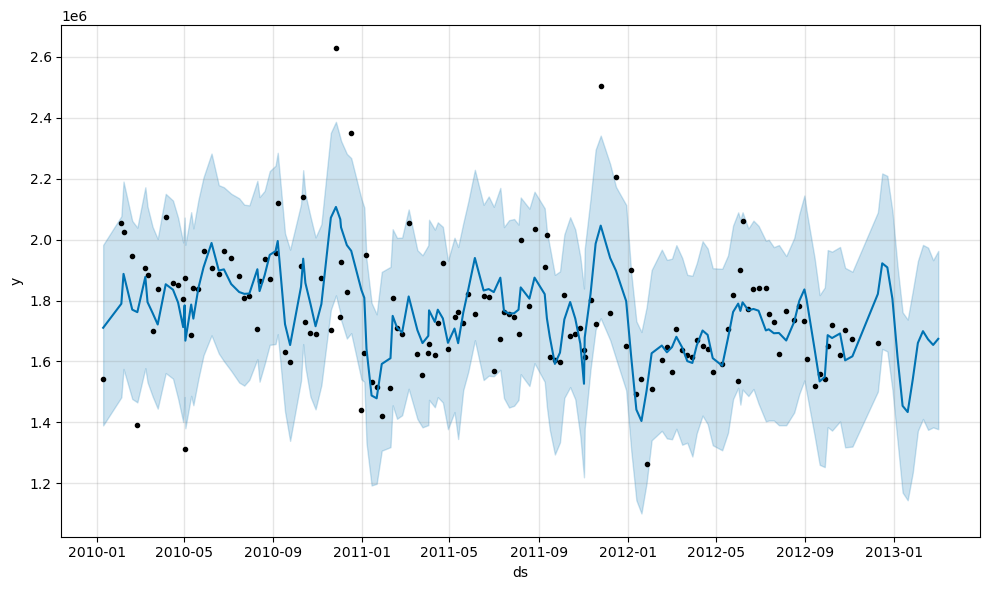

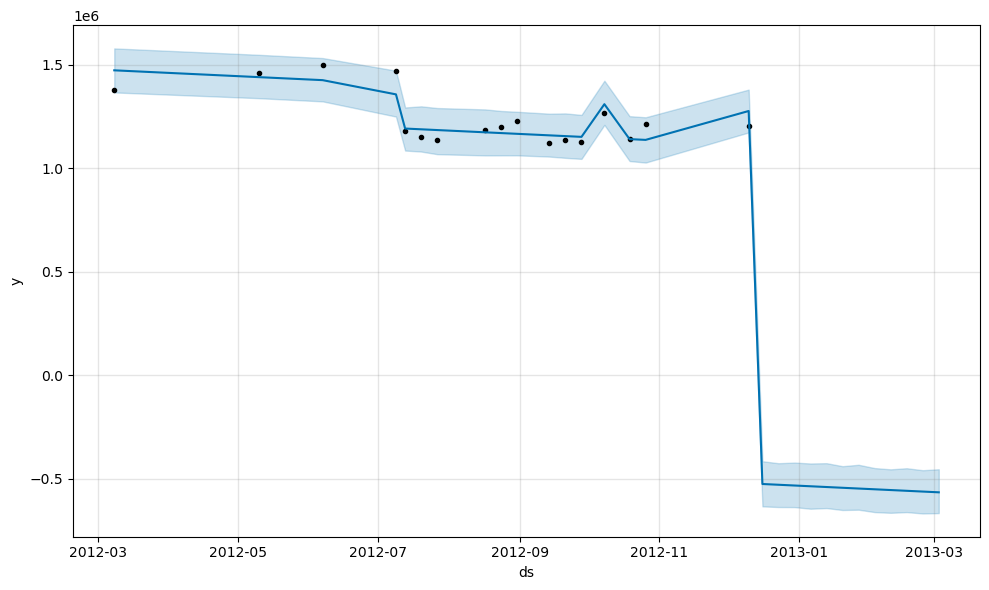

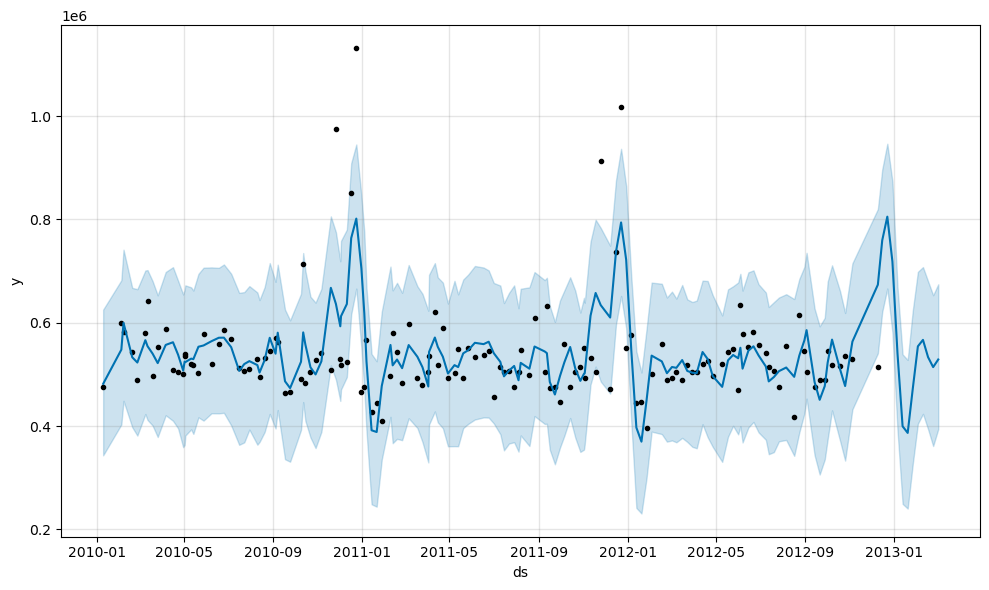

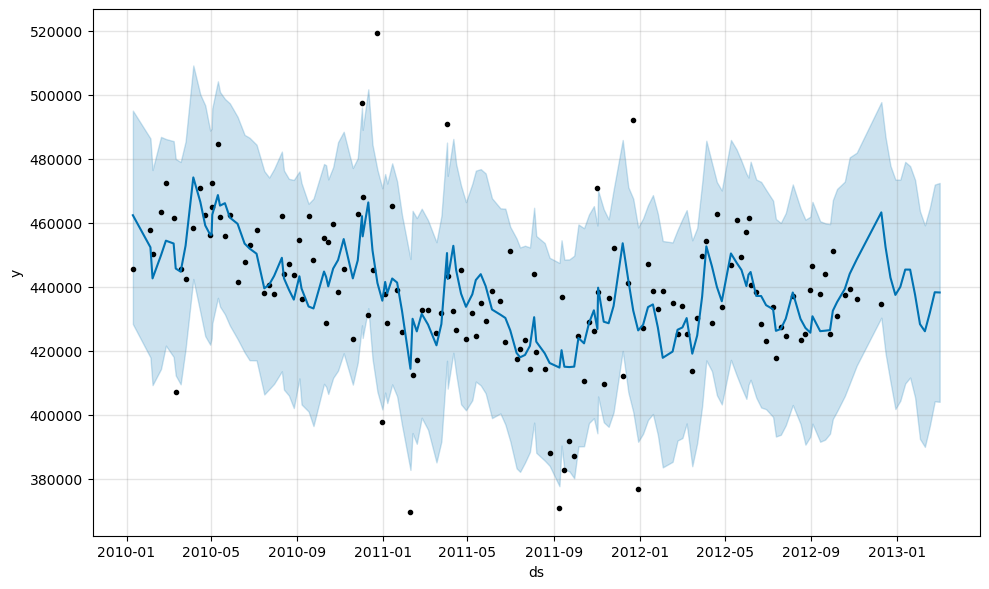

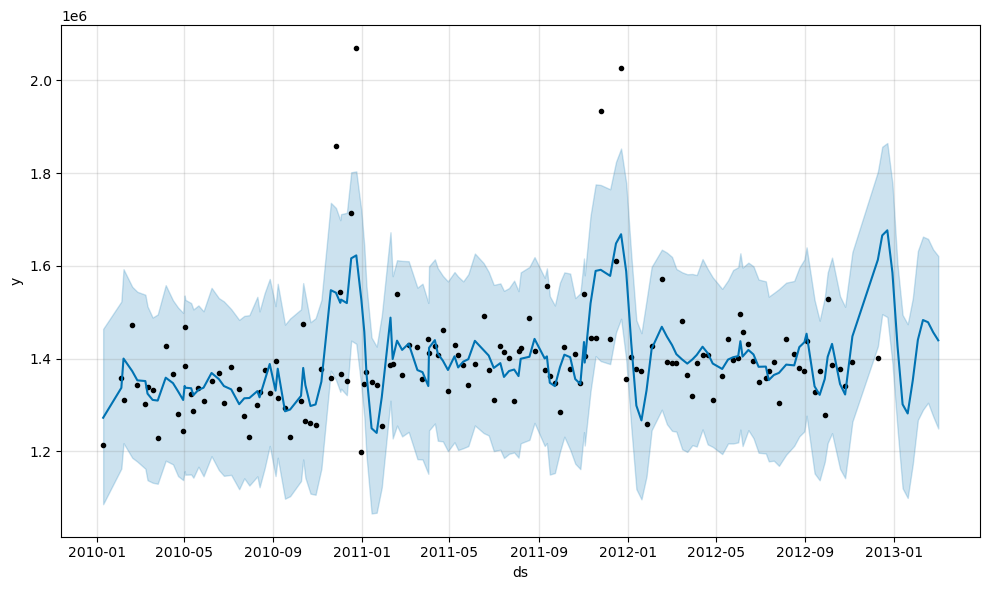

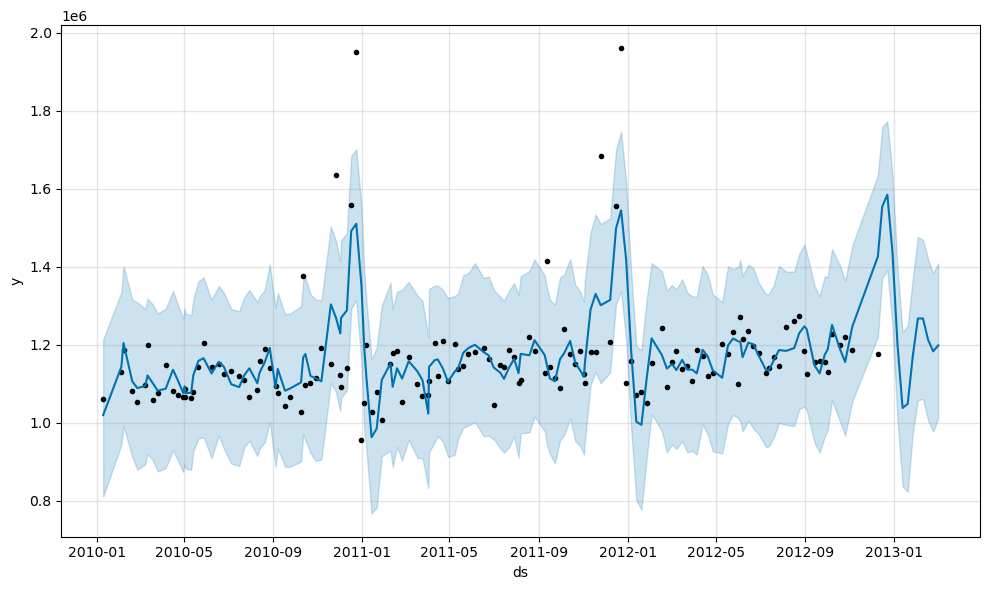

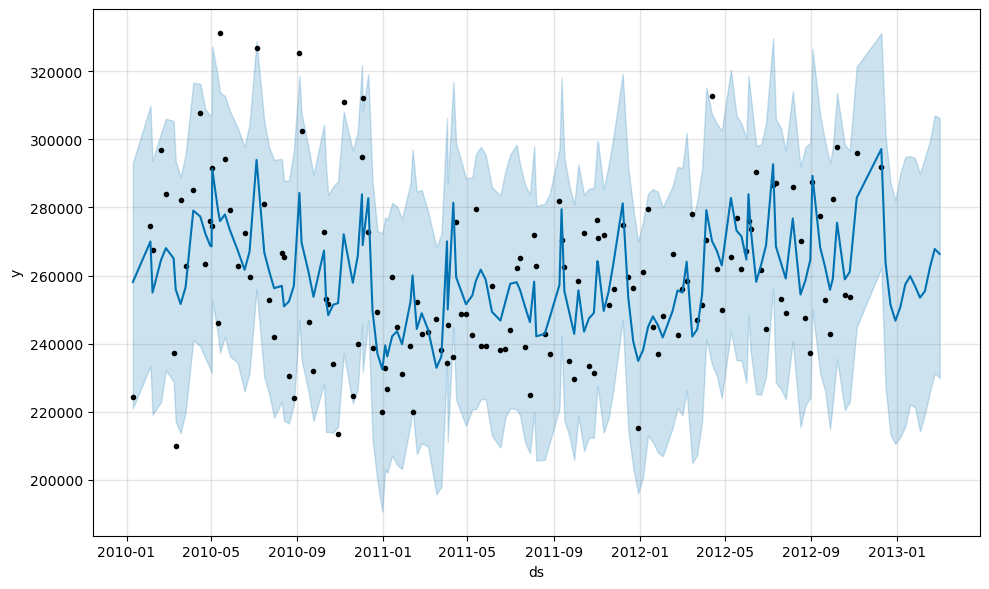

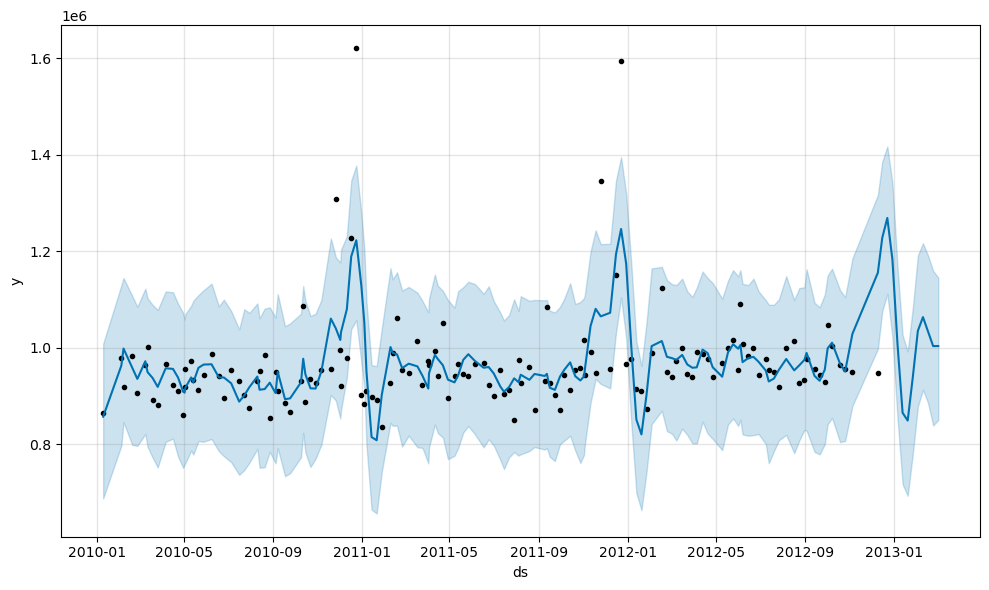

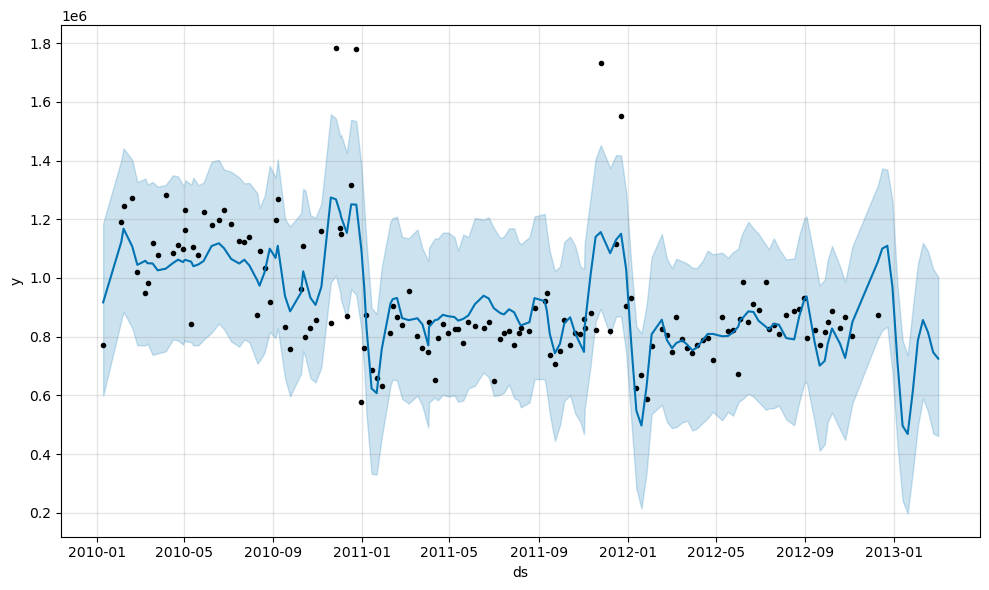

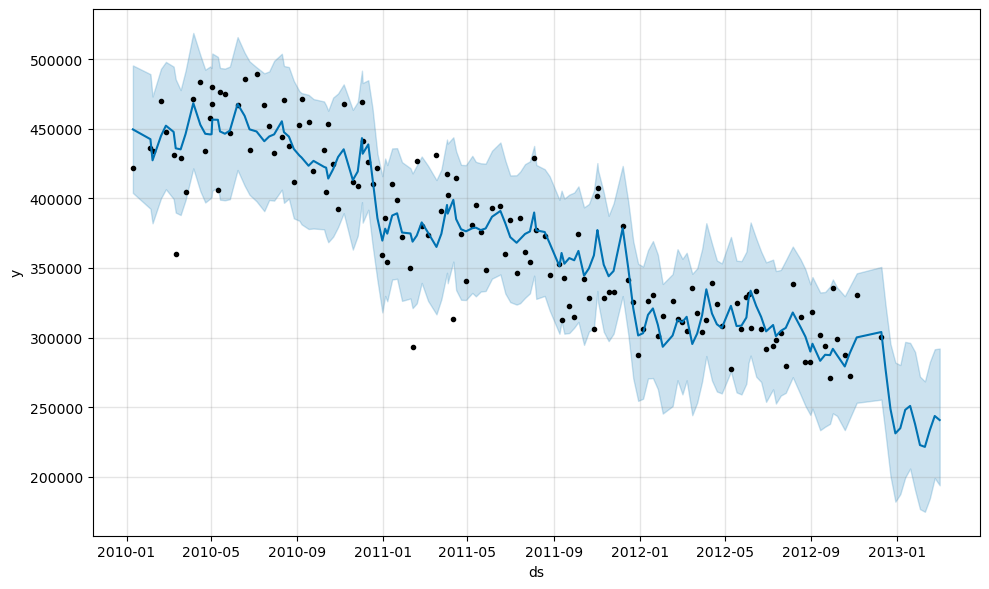

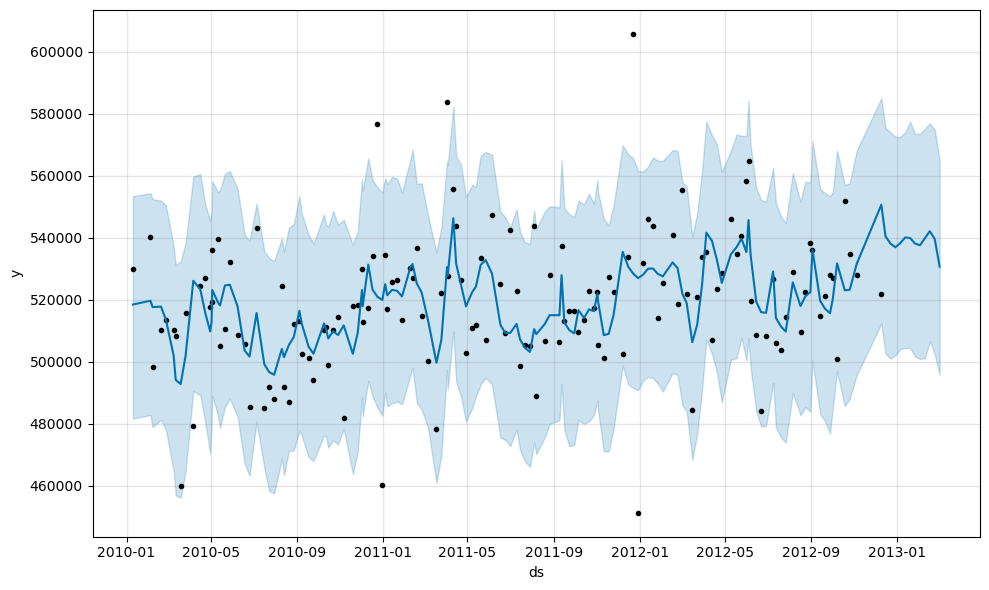

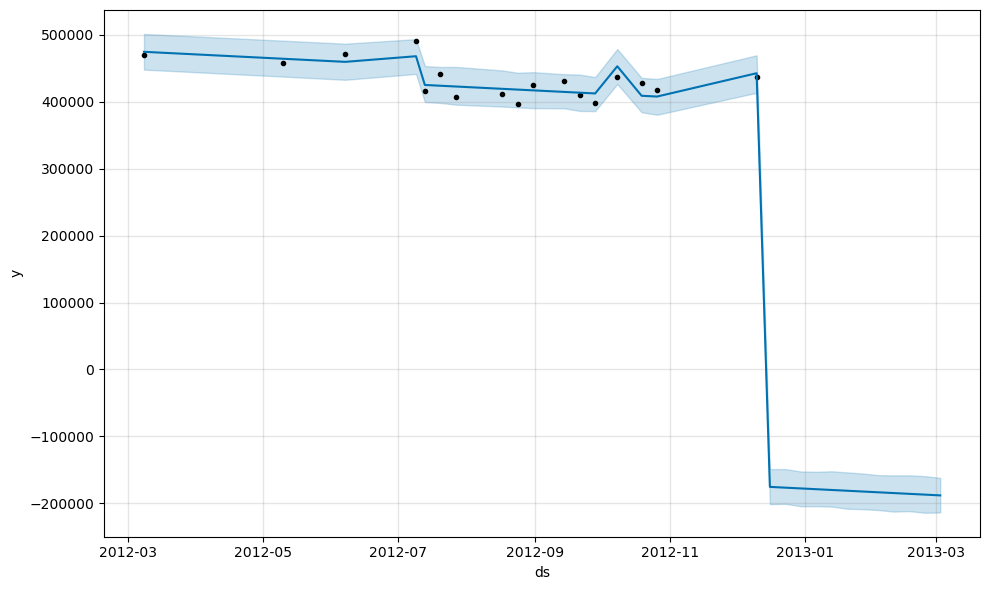

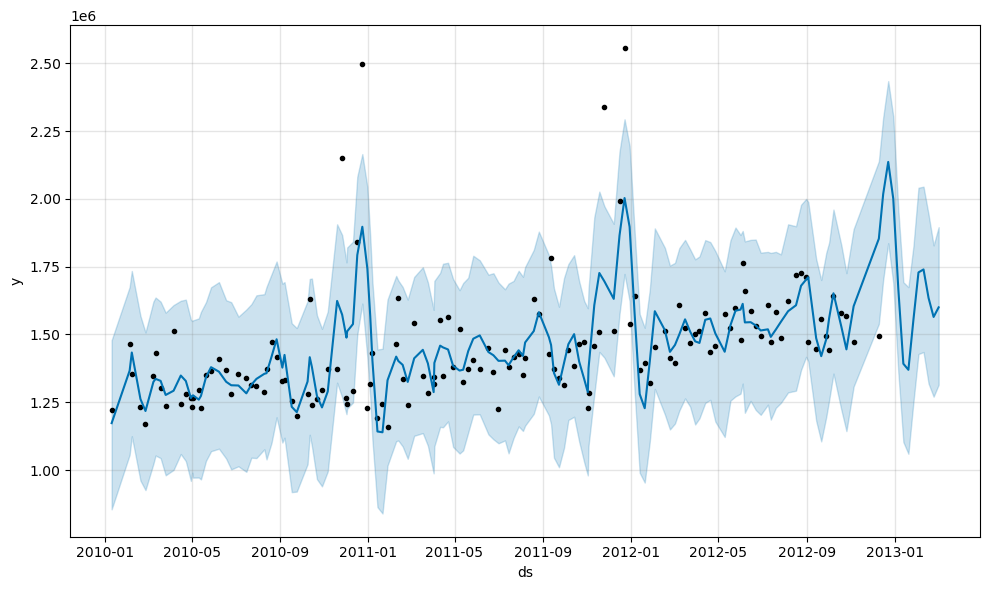

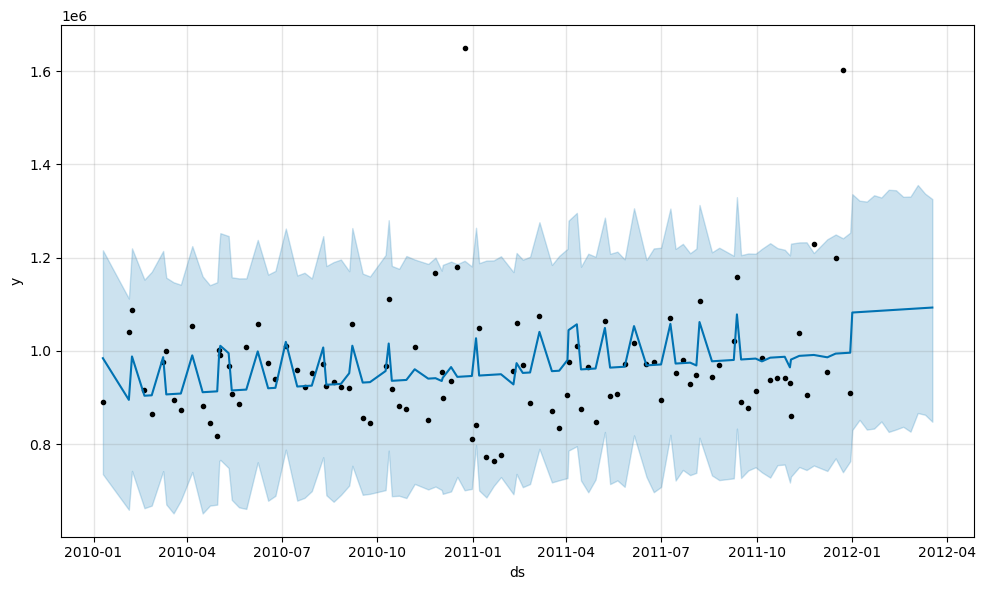

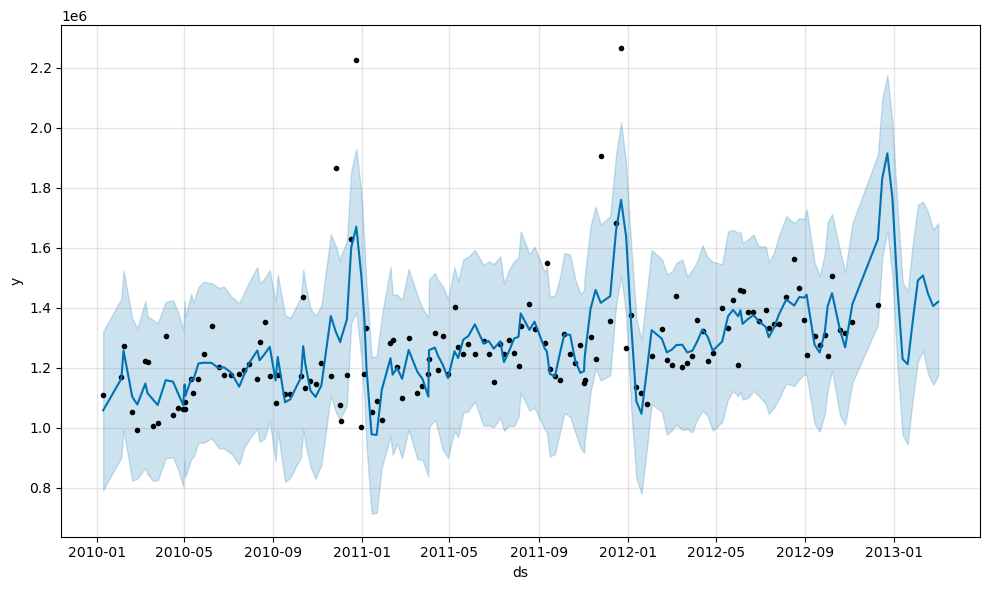

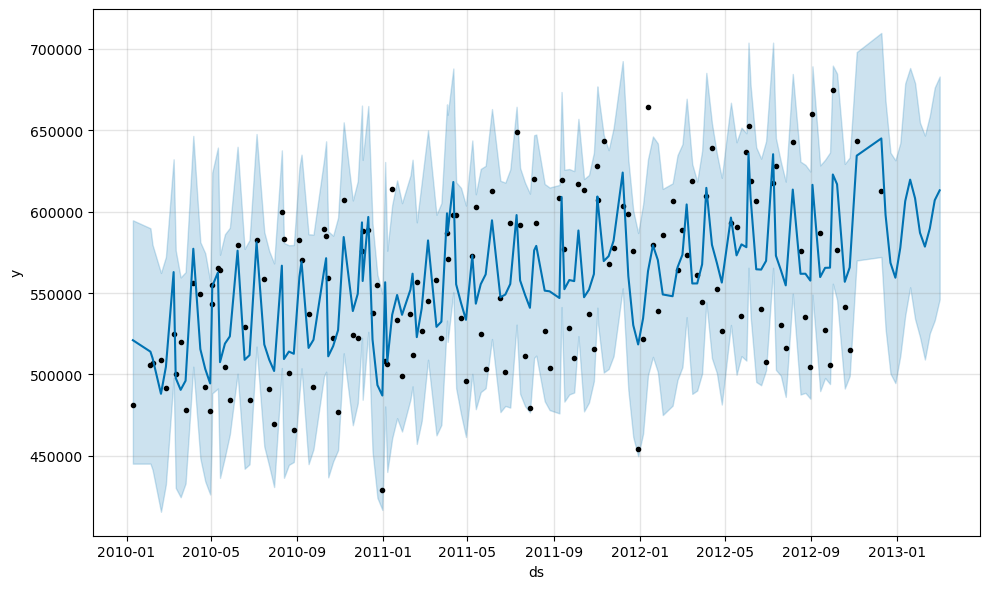

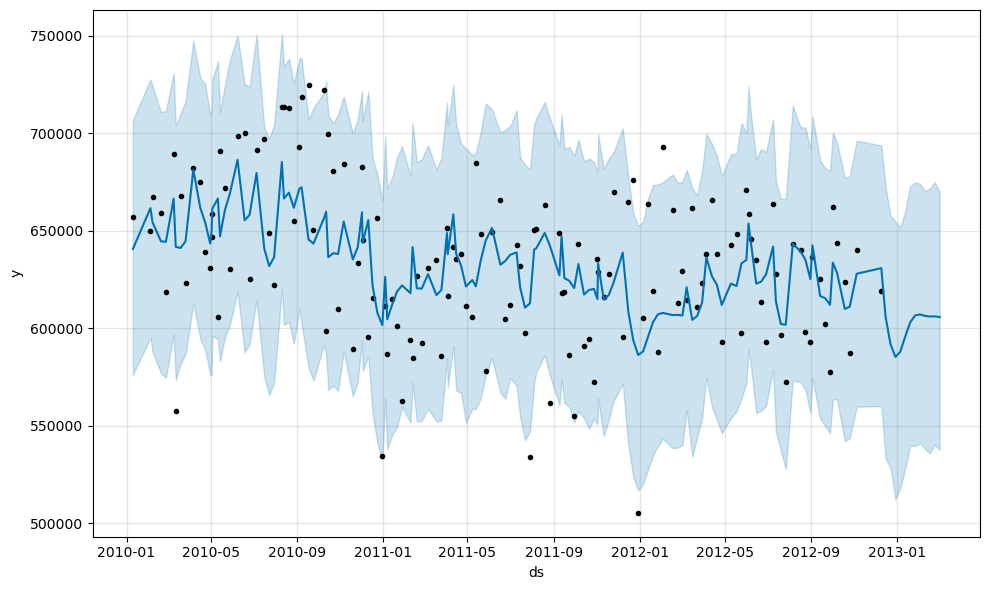

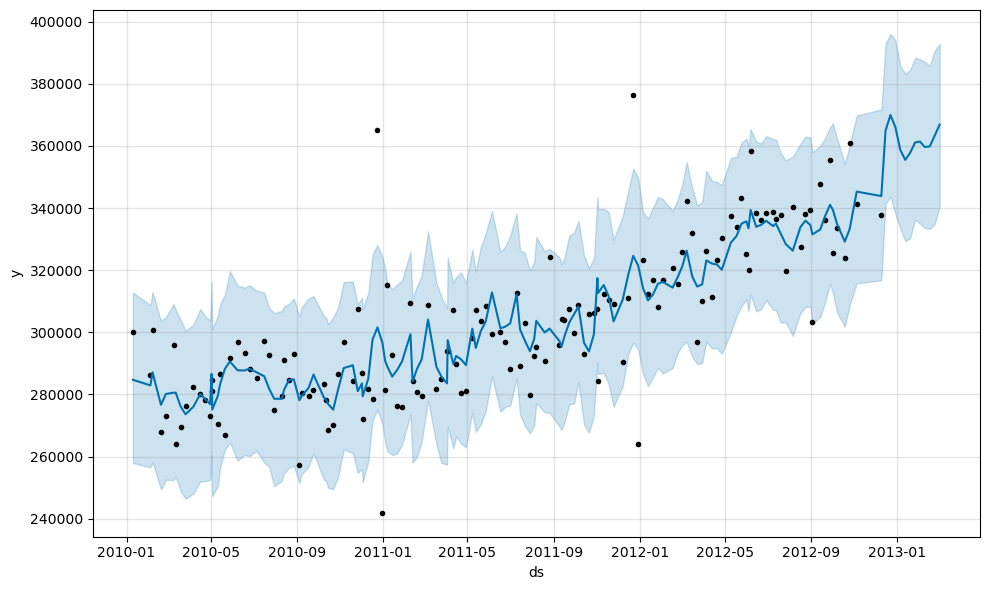

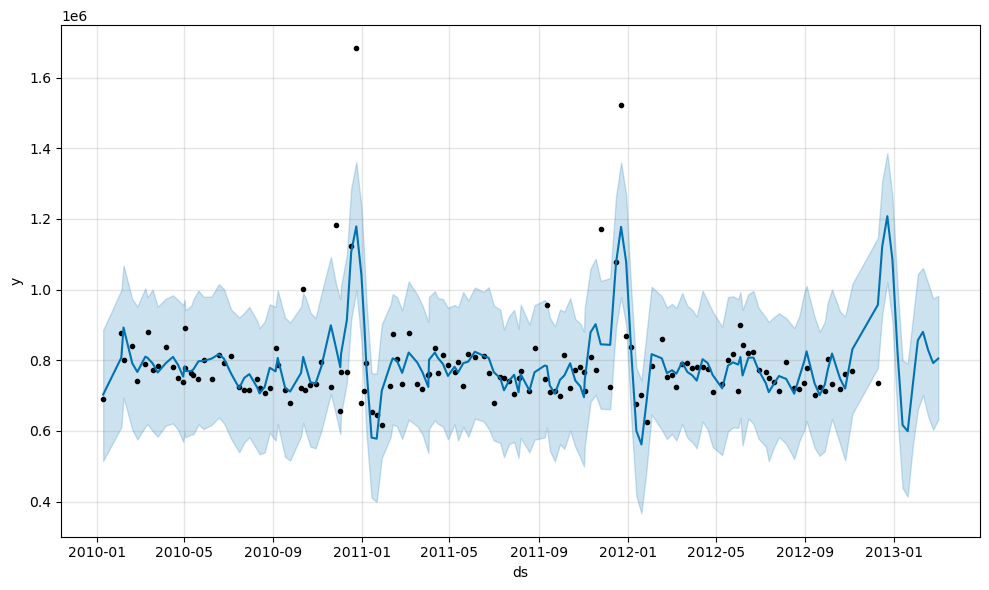

In [41]:
# Loop over each store
for store_id, store_data in df.groupby('Store'):
    print("Forecasting sales for Store", store_id)
    
    # Prepare the data for Prophet
    sales_data = store_data[['Date', 'Weekly_Sales']]
    sales_data.columns = ['ds', 'y']  # Rename columns for Prophet
    
    # Create and fit Prophet model
    model = Prophet(interval_width=0.95)
    model.fit(sales_data)
    
    # Make future dataframe for the next 12 weeks
    future = model.make_future_dataframe(periods=12, freq='W')
    
    # Make predictions
    forecast = model.predict(future)
    
    # Print or store the forecasted values
    forecasted_sales = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
    print("Forecasted sales for the next 12 weeks:")
    print(forecasted_sales[['ds', 'yhat']])
    
    confirmed_plot = model.plot(forecast)
    